### LSE Data Analytics Online Career Accelerator 
# Pescod_Henry_DA301_Assignment_Notebook_v1
### DA301:  Predicting future outcomes for Turtle Games

## Workbook that accompanies the Technical Report, R studio workbook and Presentation

### This notebook consists of 4 sections that link to Technical Report

1. Exploratory Data Analysis
> - Import and explore of data

2. What drives loyalty points of Turtle Games customers?
> - Simple linear regression
> - Decision tree regression analysis

3. How does this help to understanding Turtle Games customers?
> - segmentation of customers with k-means clustering analysis
> - natural language processing

In [280]:
# Import all required packages and libraries to be used in this notebook

# Import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import math
import warnings
import nltk 
import os 

# Import all the necessary libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
!pip install Wordcloud
!pip install textblob

# Settings for the notebook.
warnings.filterwarnings("ignore")

# 1: Exploratary Data Analysis

### 1a. Load and explore the data

In [7]:
# Load the CSV file(s) as reviews.

reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.

print(reviews.shape)
reviews.head()


(2000, 11)


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [8]:
# Any missing values?

# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [9]:
# Explore the data.

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [10]:
# Basic descriptive statistics.

reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

### 1b. Drop columns

In [12]:
# Drop unnecessary columns.

reviews_new = reviews.drop(['language', 'platform'],
                       axis=1)
# View column names.
reviews_new.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

### 1c. Rename columns

In [21]:
# Rename the column headers.
reviews_new = reviews_new.rename(columns={'remuneration (k£)':'remuneration', \
                                          'spending_score (1-100)':'spending_score'})

# View column names.
reviews_new.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

### 1d. Save the DataFrame as a CSV file

In [23]:
# Create a CSV file as output.

reviews_new.to_csv('reviews_new.csv', index=False)

In [25]:
# Import new CSV file with Pandas.

turtle_reviews = pd.read_csv('reviews_new.csv')

# View DataFrame.
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


# 2: Identifying key drivers of loyalty point accumulation 

> - 2a) Linear Regression
> - 2b) Decision tree regression analysis 

## 2a. Linear regression

#### i) Whats the relationship between spending score vs loyalty points?

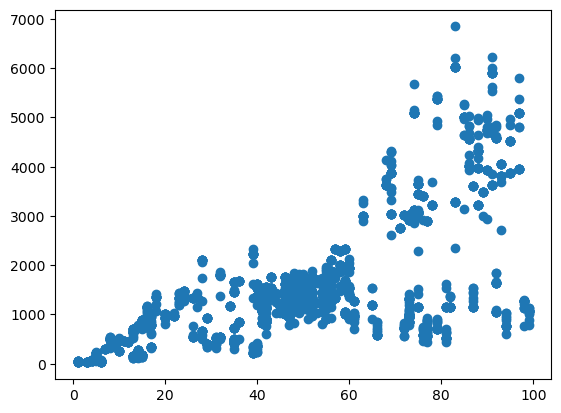

In [27]:
# Define independent variable.
x = turtle_reviews['spending_score'] 

# Define dependent variable.
y = turtle_reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)


In [29]:
# Create model and print summary of metrics.
f1 = 'y ~ x'
test1 = ols(f1, data = turtle_reviews).fit()

# Print the regression table.
test1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.92e-263
Time:                        18:18:47   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [33]:
# Create the linear regression model.
# Set the X coefficient to 33.061 and the constant to -75.052 to generate the regression table..
y_pred_1 = (-75.052) + 33.061 * turtle_reviews['spending_score']

# View the output.
y_pred_1


0       1214.327
1       2602.889
2        123.314
3       2470.645
4       1247.388
          ...   
1995    2206.157
1996     189.436
1997    2933.499
1998     453.924
1999     189.436
Name: spending_score, Length: 2000, dtype: float64

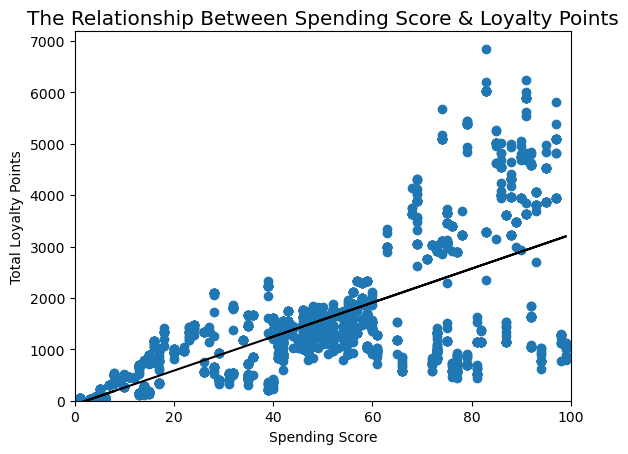

In [24]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred_1, color='black')

# Set the x and y limits on the axes.
plt.xlim(0,100)
plt.ylim(0)

# Set the classic style for the plot
plt.style.use('classic')

# Add labels for the axes.
plt.xlabel('Spending Score')
plt.ylabel('Total Loyalty Points')

# Add a title to the plot.
plt.title('The Relationship Between Spending Score & Loyalty Points')

# View the plot.
plt.show()

#### ii) Whats the relationship between renumeration vs loyalty points?

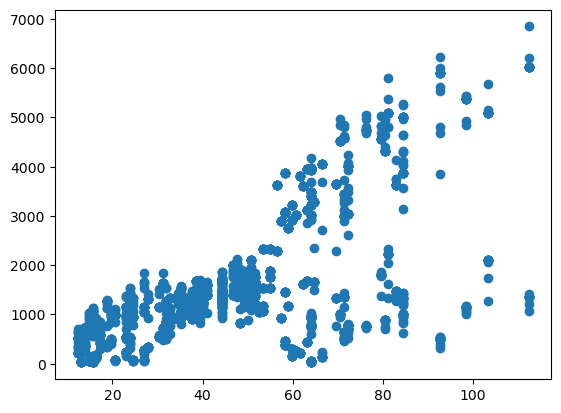

In [35]:
# Define independent variable.
x = turtle_reviews['remuneration'] 

# Define dependent variable.
y = turtle_reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)


In [27]:
# Create model and print summary of metrics.
f2 = 'y ~ x'
test2 = ols(f2, data = turtle_reviews).fit()

# Print the regression table.
test2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.43e-209
Time:                        13:18:19   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [37]:
# Create the linear regression model.
# Set the X coefficient to 34.187 and the constant to -65.686 to generate the regression table..
y_pred_2 = (-65.686) + 34.187 * turtle_reviews['remuneration']

# View the output.
y_pred_2


0        354.81410
1        354.81410
2        382.84744
3        382.84744
4        410.88078
           ...    
1995    2821.74802
1996    3102.08142
1997    3102.08142
1998    3298.31480
1999    3102.08142
Name: remuneration, Length: 2000, dtype: float64

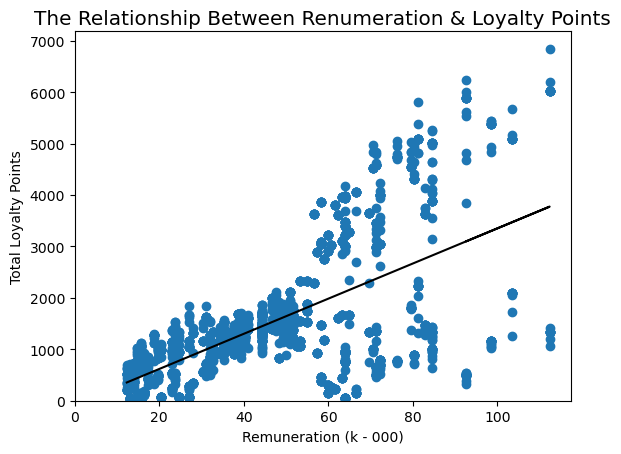

In [39]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred_2, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set the classic style for the plot
plt.style.use('classic')

# Add labels for the axes.
plt.xlabel('Remuneration (k - 000)')
plt.ylabel('Total Loyalty Points')

# Add a title to the plot.
plt.title('The Relationship Between Renumeration & Loyalty Points')

# View the plot.
plt.show()

#### iii) whats the relationship between age vs loyalty points?

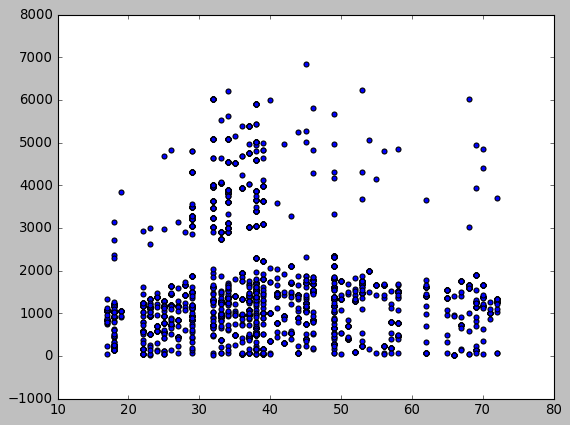

In [32]:
# Define independent variable.
x = turtle_reviews['age'] 

# Define dependent variable.
y = turtle_reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)


In [33]:
# Create model and print summary of metrics.
f3 = 'y ~ x'
test3 = ols(f3, data = turtle_reviews).fit()

# Print the regression table.
test3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 29 Sep 2024   Prob (F-statistic):             0.0577
Time:                        13:18:19   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Extract the estimated parameters.
print("Parameters: ", test3.params)  

# Extract the standard errors.
print("Standard errors: ", test3.bse)  

# Extract the predicted values.
print("Predicted values: ", test3.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [35]:
# Create the linear regression model.
# Set the X coefficient to -4.013 and the constant to 1736.517 to generate the regression table..
y_pred_3 = (1736.517) + -4.013 * turtle_reviews['age']

# View the output.
y_pred_3


0       1664.283
1       1644.218
2       1648.231
3       1636.192
4       1604.088
          ...   
1995    1588.036
1996    1563.958
1997    1600.075
1998    1600.075
1999    1608.101
Name: age, Length: 2000, dtype: float64

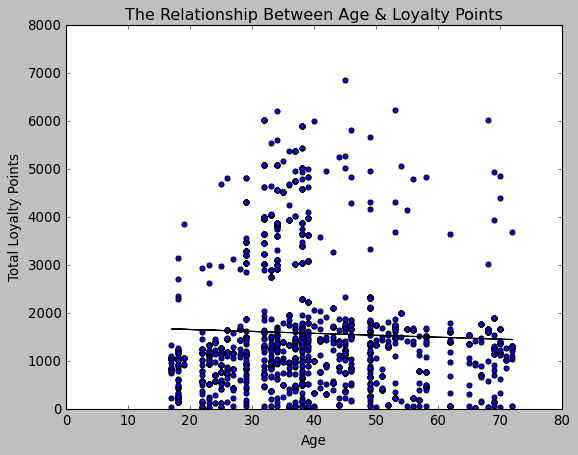

In [36]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred_3, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add labels for the axes.
plt.xlabel('Age')
plt.ylabel('Total Loyalty Points')

# Add a title to the plot.
plt.title('The Relationship Between Age & Loyalty Points')

# View the plot.
plt.show()


### 1f. Observations and insights

Renmeration and loyalty points
- Positive correlation - R2 0.38, not as strong as spending score
- Heavy tailed positive skew highlighted by Kurtosis of 0.38

Spending score and loyaly points
- Positive correlation evident between spending score and loyalty points (45.2 r2)
- Heavy tailed positive skew highlighted by Kurtosis of 4.554

Age & loyalty points

- The r2 valued for 'age' vs 'loyalty' is veis not a significant variable in effecting the accumulation of loyalty points
- next step could be to conduct a MLR for spending and remuneration vs loyalty
- Spending score & loyalty points

## 2b. Decision Tree Regression Analysis

#### i). Load and prepare the data

In [41]:
# import data into Python 
# Create your new DataFrame.
df2 = pd.read_csv('reviews_new.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [43]:
# Determine the number of missing values.
df2.isna().sum()

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [45]:
# Compile descriptive statistics
df2.describe()

age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [44]:
# Specify the DataFrame column and add/determine the values.
df2['education'].value_counts() 

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

In [47]:
# Specify the DataFrame column and add/determine the values.
df2['gender'].value_counts() 

gender
Female    1120
Male       880
Name: count, dtype: int64

In [49]:
# Specify the DataFrame column and add/determine the values.
df2['review'].value_counts()

review
love it                                                                                                                                                                                                                                                                                                                                                     5
great game                                                                                                                                                                                                                                                                                                                                                  3
Love it                                                                                                                                                                                                                                                                                              

In [51]:
# Specify the DataFrame column and add/determine the values.
df2['summary'].value_counts()

summary
Five Stars                                        378
Four Stars                                         57
Three Stars                                        14
Two Stars                                          12
Great game                                         11
                                                 ... 
Fun puzzle for children                             1
Easy to manipulate                                  1
Awesome Puzzle!                                     1
Great Beginning Jigaw Puzzle                        1
The perfect word game for mixed ages (with Mom      1
Name: count, Length: 1432, dtype: int64

> - observation here would be to drop the summary and review columns which contain unqiue text on each row and will be hard to turn into dummy variables
> - convert gender into dummy variable

#### ii). Create dummy variables

In [53]:
# Convert 'gender' into dummy variables
df2 = pd.get_dummies(df2, columns=['gender','education'], drop_first=True)

# Drop the 'reviews' and 'summary' columns
df2 = df2.drop(['review', 'summary'], axis=1)

# Final DataFrame
df_fin = df2

# Display the resulting DataFrame columns
print(df_fin.columns.values)

['age' 'remuneration' 'spending_score' 'loyalty_points' 'product'
 'gender_Male' 'education_PhD' 'education_diploma' 'education_graduate'
 'education_postgraduate']


Note
> - following EDA in R, I decided to focus the regression model only on 3 variables that have an impact on the dependent variable - age, renumeration and spending score, therefore do no require the dummy variables for the categorical variables
> - also decided to split the data into 3 parts, 1) a training set, 2) a test set and 3) a validation set  

#### iii) Define variables

In [55]:
# Specify Y.
y = df_fin['loyalty_points']

# Specify X.
X = df_fin[['age', 'remuneration', 'spending_score']]

#### iv). Create training, testing and validation data sets (60% train / 20% test / 20% validate)

In [55]:
# Split the data into 60% training, 20% validation, and 20% test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#### v). Create Decision tree regressor

In [57]:
# Create decision tree regressor.

# Create the 'DecisionTreeRegressor' class 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(random_state=42)

In [58]:
# Evaluate the model on the test set.
y_test_predict_unpruned = regressor.predict(X_test)  

# Calculate metrics for the test set
mae_test_unpruned = metrics.mean_absolute_error(y_test, y_test_predict_unpruned)
mse_test_unpruned = metrics.mean_squared_error(y_test, y_test_predict_unpruned)
rmse_test_unpruned = math.sqrt(metrics.mean_squared_error(y_test, y_test_predict_unpruned))
r2_test_unpruned = r2_score(y_test, y_test_predict_unpruned)

# Print the metrics for the test set
print(f"Test Metrics:\nMean Absolute Error: ", mae_test_unpruned)
print("Mean Squared Error: ", mse_test_unpruned)
print("Root Mean Squared Error: ", rmse_test_unpruned)
print(f"R-squared: {r2_test_unpruned}")

Test Metrics:
Mean Absolute Error:  23.96
Mean Squared Error:  5442.09
Root Mean Squared Error:  73.7705225682996
R-squared: 0.9969223368264497


In [59]:
# Compare with the validation set
y_val_predict_unpruned = regressor.predict(X_val)

# Calculate metrics for the validation set
mae_val_unpruned = metrics.mean_absolute_error(y_val, y_val_predict_unpruned)
mse_val_unpruned = metrics.mean_squared_error(y_val, y_val_predict_unpruned)
rmse_val_unpruned = math.sqrt(metrics.mean_squared_error(y_val, y_val_predict_unpruned))
r2_val_unpruned = r2_score(y_val, y_val_predict_unpruned)

# Print the metrics for the validation set
print(f"Test Metrics:\nMean Absolute Error: ", mae_val_unpruned)
print("Mean Squared Error: ", mse_val_unpruned)
print("Root Mean Squared Error: ", rmse_val_unpruned)
print(f"R-squared: {r2_val_unpruned}")

Test Metrics:
Mean Absolute Error:  25.58
Mean Squared Error:  4951.655
Root Mean Squared Error:  70.36799698726688
R-squared: 0.9965971305246755


#### Observations
> - the metrics on the test and validation sets are similar, it indicates that the model generalises well on new data.
> - no significant difference between metrics suggests model has not overfitted


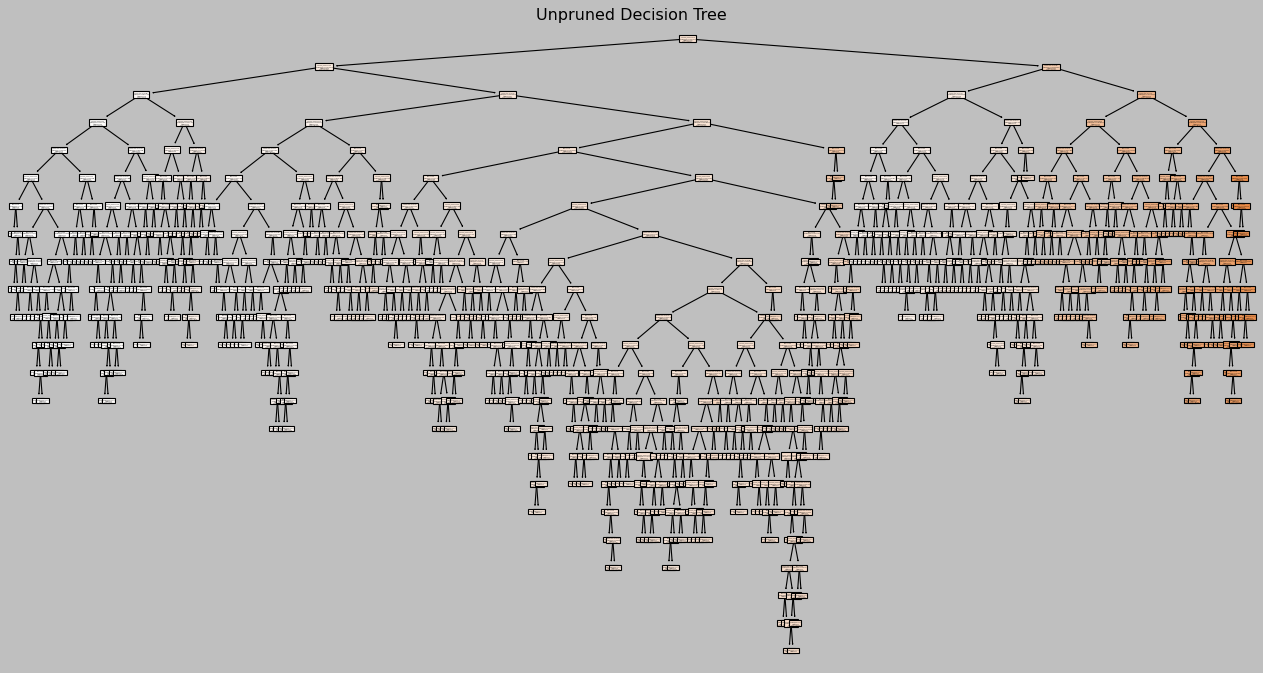

In [61]:
# Plot the desicion tree

# Initialize the DecisionTreeRegressor 
unpruned_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
unpruned_regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(unpruned_regressor, feature_names=X_train.columns,filled=True)
plt.title("Unpruned Decision Tree")

# Display the plot
plt.show() 


### Observations
> - model is showing very high accuracy scores and low error ratio
> - the similarity of the metrics between the test and validation sets indicate the model is not overfitting, and generalises well with new data.
> - MAE of 25.58 suggests that the model is fairly close to the actual values on average, but there are still significant errors. MSE of 4951.65 and RMSE of 73.77 indicate that some errors are much larger than others, pulling up the average error.
> - the decision tree however is very complex with a depth of 21 - this might become problem on larger data sets where riusk of overfitting the data, but also it's less interpretable for Turtle games to understand.
> - Next step will be the simplify the model by pruning it to different depths to see what this does to the metrics  


#### vi) Prune the model to find best fit

#### Prune model to max depth 3

In [65]:
# Create your decision tree regressor.

# Initialise the DecisionTreeRegressor with pruning parameters
regressor1 = DecisionTreeRegressor(max_depth=3,   # Limit the depth of the tree
                                  min_samples_leaf=5,  # Minimum number of samples per leaf node
                                  min_samples_split=5,  # Minimum number of samples required to split an internal node
                                  random_state=42)  # Set a random state for reproducibility

# Fit the regressor object to the data set.
regressor1.fit(X_train,y_train)  

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [66]:
# Evaluate the model on the test set.
y_test_predict_pruned_3 = regressor1.predict(X_test)  

# Calculate metrics for the test set
mae_test_pruned_3 = metrics.mean_absolute_error(y_test, y_test_predict_pruned_3)
mse_test_pruned_3 = metrics.mean_squared_error(y_test, y_test_predict_pruned_3)
rmse_test_pruned_3 = math.sqrt(metrics.mean_squared_error(y_test, y_test_predict_pruned_3))
r2_test_pruned_3 = r2_score(y_test, y_test_predict_pruned_3)

# Print the metrics for the test set
print(f"Test Metrics:\nMean Absolute Error: ", mae_test_pruned_3)
print("Mean Squared Error: ", mse_test_pruned_3)
print("Root Mean Squared Error: ", rmse_test_pruned_3)
print(f"R-squared: {r2_test_pruned_3}")

Test Metrics:
Mean Absolute Error:  279.8953317048657
Mean Squared Error:  146819.57138287014
Root Mean Squared Error:  383.1704208089008
R-squared: 0.9169691813252814


In [67]:
# Compare with the validation set
y_val_predict_pruned_3 = regressor1.predict(X_val)

# Calculate metrics for the validation set
mae_val_pruned_3 = metrics.mean_absolute_error(y_val, y_val_predict_pruned_3)
mse_val_pruned_3 = metrics.mean_squared_error(y_val, y_val_predict_pruned_3)
rmse_val_pruned_3 = math.sqrt(metrics.mean_squared_error(y_val, y_val_predict_pruned_3))
r2_val_pruned_3 = r2_score(y_val, y_val_predict_pruned_3)

# Print the metrics for the validation set
print(f"Validation Metrics:\nMean Absolute Error: ", mae_val_pruned_3)
print("Mean Squared Error: ", mse_val_pruned_3)
print("Root Mean Squared Error: ", rmse_val_pruned_3)
print(f"R-squared: {r2_val_pruned_3}")

Validation Metrics:
Mean Absolute Error:  255.33225707663
Mean Squared Error:  120291.59002954514
Root Mean Squared Error:  346.8307801068774
R-squared: 0.9173333804859598


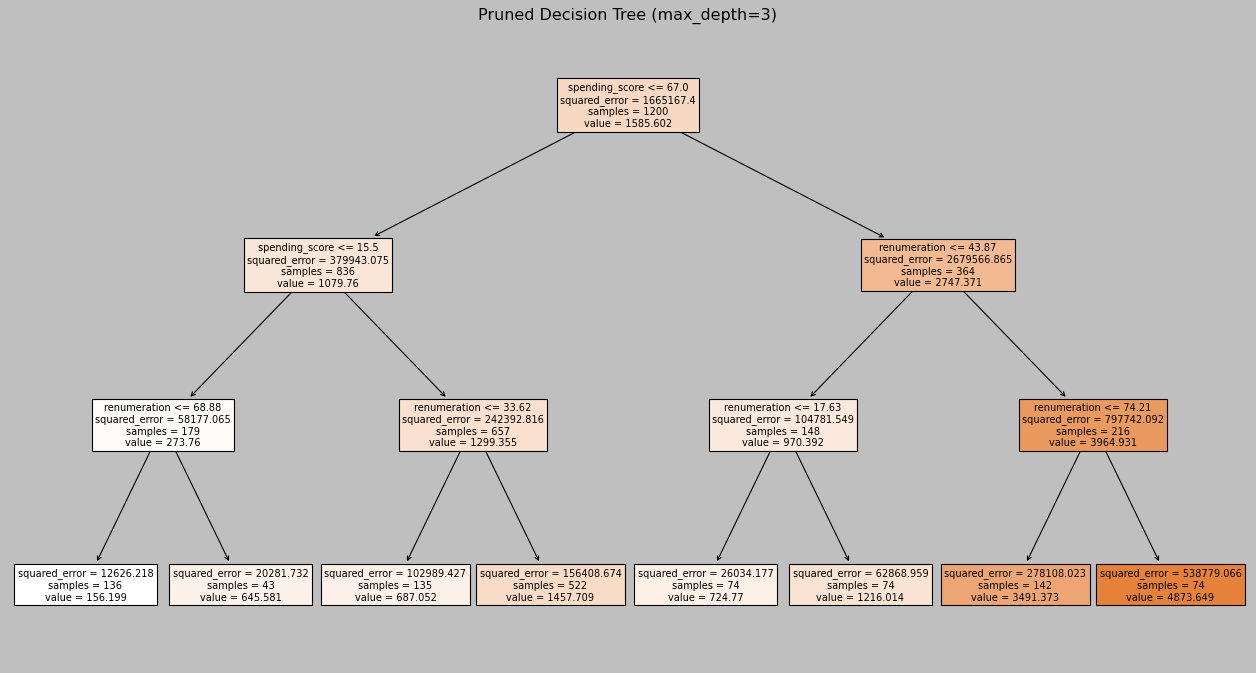

In [68]:
# Fit and plot the model.

# Initialize the DecisionTreeRegressor with max_depth of 3
pruned_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the model on the training data
pruned_regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_regressor, feature_names=X_train.columns,filled=True)
plt.title("Pruned Decision Tree (max_depth=3)")

# Display the plot
plt.show() 

#### Observations
> - the metrics on the test and validation sets are similar, indicating that the model generalises well on new data.
> - no significant difference between metrics suggests model has not overfitted
> - r2 value of 0.9169 shows a high level of accuracy, but not as high as the unpruned model
> - much higher level of error compared to the unpruned model
> - the decision tree is non complex comapre to the unpruned decision tree
> - Will investigate greater depths of 5, 7 and 9 to see if R2 and error figures can be improved     

#### Prune model to max depth 5

In [71]:
# Create your decision tree regressor.

# Initialize the DecisionTreeRegressor with pre-pruning parameters (controlled complexity)
regressor2 = DecisionTreeRegressor(max_depth=5,   # Limit the depth of the tree
                                  min_samples_leaf=5,  # Minimum number of samples per leaf node
                                  min_samples_split=5,  # Minimum number of samples required to split an internal node
                                  random_state=42)  # Set a random state for reproducibility

# Fit the regressor object to the data set.
regressor2.fit(X_train,y_train)  

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [72]:
# Evaluate the model on the test set.
y_test_predict_pruned_5 = regressor2.predict(X_test)  

# Calculate metrics for the test set
mae_test_pruned_5 = metrics.mean_absolute_error(y_test, y_test_predict_pruned_5)
mse_test_pruned_5 = metrics.mean_squared_error(y_test, y_test_predict_pruned_5)
rmse_test_pruned_5 = math.sqrt(metrics.mean_squared_error(y_test, y_test_predict_pruned_5))
r2_test_pruned_5 = r2_score(y_test, y_test_predict_pruned_5)

# Print the metrics for the test set
print(f"Test Metrics:\nMean Absolute Error: ", mae_test_pruned_5)
print("Mean Squared Error: ", mse_test_pruned_5)
print("Root Mean Squared Error: ", rmse_test_pruned_5)
print(f"R-squared: {r2_test_pruned_5}")

Test Metrics:
Mean Absolute Error:  182.266856192643
Mean Squared Error:  75027.11878035874
Root Mean Squared Error:  273.9107861701666
R-squared: 0.9575699408705305


In [73]:
# Compare with the validation set
y_val_predict_pruned_5 = regressor2.predict(X_val)

# Calculate metrics for the validation set
mae_val_pruned_5 = metrics.mean_absolute_error(y_val, y_val_predict_pruned_5)
mse_val_pruned_5 = metrics.mean_squared_error(y_val, y_val_predict_pruned_5)
rmse_val_pruned_5 = math.sqrt(metrics.mean_squared_error(y_val, y_val_predict_pruned_5))
r2_val_pruned_5 = r2_score(y_val, y_val_predict_pruned_5)

# Print the metrics for the validation set
print(f"Validation Metrics:\nMean Absolute Error: ", mae_val_pruned_5)
print("Mean Squared Error: ", mse_val_pruned_5)
print("Root Mean Squared Error: ", rmse_val_pruned_5)
print(f"R-squared: {r2_val_pruned_5}")

Validation Metrics:
Mean Absolute Error:  172.78922468637813
Mean Squared Error:  62649.73830734566
Root Mean Squared Error:  250.29929745675608
R-squared: 0.9569459338093752


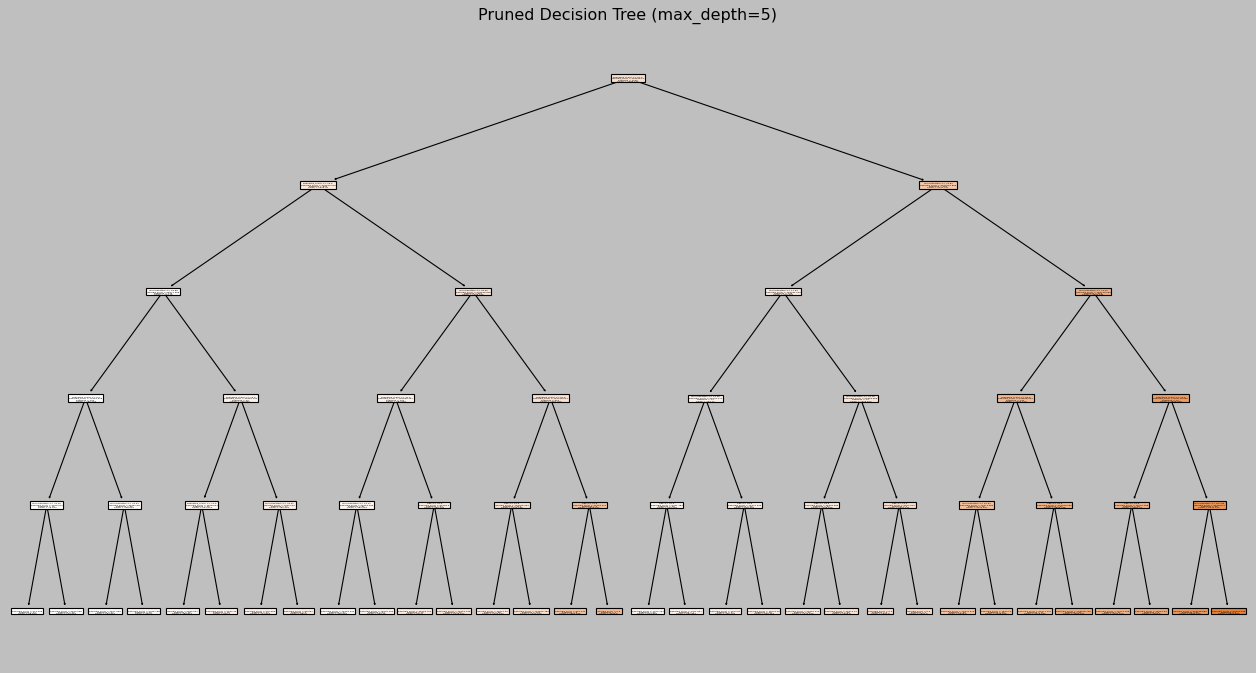

In [74]:
# Fit and plot the model.

# Initialize the DecisionTreeRegressor with max_depth of 5
pruned_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on the training data
pruned_regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_regressor, feature_names=X_train.columns,filled=True)
plt.title("Pruned Decision Tree (max_depth=5)")

# Display the plot
plt.show() 

#### Observations
> - the metrics on the test and validation sets are similar, indicating that the model generalises well on new data.
> - no significant difference between metrics suggests model has not overfitted
> - r2 value of 0.9575 shows a higher level of predictive accuracy than the 3 depth model, but still not as high as the unpruned model
> - still a high level of error compared to the unpruned model
> - the decision tree is non complex compare to the unpruned decision tree
> - Will investigate greater depths of 7 and 9 to see if R2 and error figures can be improved  

#### Prune model to max depth 7

In [77]:
# Create your decision tree regressor.

# Initialize the DecisionTreeRegressor with pre-pruning parameters (controlled complexity)
regressor3 = DecisionTreeRegressor(max_depth=7,   # Limit the depth of the tree
                                  min_samples_leaf=5,  # Minimum number of samples per leaf node
                                  min_samples_split=5,  # Minimum number of samples required to split an internal node
                                  random_state=42)  # Set a random state for reproducibility

# Fit the regressor object to the data set.
regressor3.fit(X_train,y_train)  

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [78]:
# Evaluate the model on the test set.
y_test_predict_pruned_7 = regressor3.predict(X_test)  

# Calculate metrics for the test set
mae_test_pruned_7 = metrics.mean_absolute_error(y_test, y_test_predict_pruned_7)
mse_test_pruned_7 = metrics.mean_squared_error(y_test, y_test_predict_pruned_7)
rmse_test_pruned_7 = math.sqrt(metrics.mean_squared_error(y_test, y_test_predict_pruned_7))
r2_test_pruned_7 = r2_score(y_test, y_test_predict_pruned_7)

# Print the metrics for the test set
print(f"Test Metrics:\nMean Absolute Error: ", mae_test_pruned_7)
print("Mean Squared Error: ", mse_test_pruned_7)
print("Root Mean Squared Error: ", rmse_test_pruned_7)
print(f"R-squared: {r2_test_pruned_7}")

Test Metrics:
Mean Absolute Error:  117.07990620419272
Mean Squared Error:  33921.684329468415
Root Mean Squared Error:  184.17840353708254
R-squared: 0.9808162822287755


In [79]:
# Compare with the validation set
y_val_predict_pruned_7 = regressor3.predict(X_val)

# Calculate metrics for the validation set
mae_val_pruned_7 = metrics.mean_absolute_error(y_val, y_val_predict_pruned_7)
mse_val_pruned_7 = metrics.mean_squared_error(y_val, y_val_predict_pruned_7)
rmse_val_pruned_7 = math.sqrt(metrics.mean_squared_error(y_val, y_val_predict_pruned_7))
r2_val_pruned_7 = r2_score(y_val, y_val_predict_pruned_7)

# Print the metrics for the validation set
print(f"Validation Metrics:\nMean Absolute Error: ", mae_val_pruned_7)
print("Mean Squared Error: ", mse_val_pruned_7)
print("Root Mean Squared Error: ", rmse_val_pruned_7)
print(f"R-squared: {r2_val_pruned_7}")

Validation Metrics:
Mean Absolute Error:  128.61341664674413
Mean Squared Error:  35123.25912165175
Root Mean Squared Error:  187.41200367546298
R-squared: 0.9758626426237321


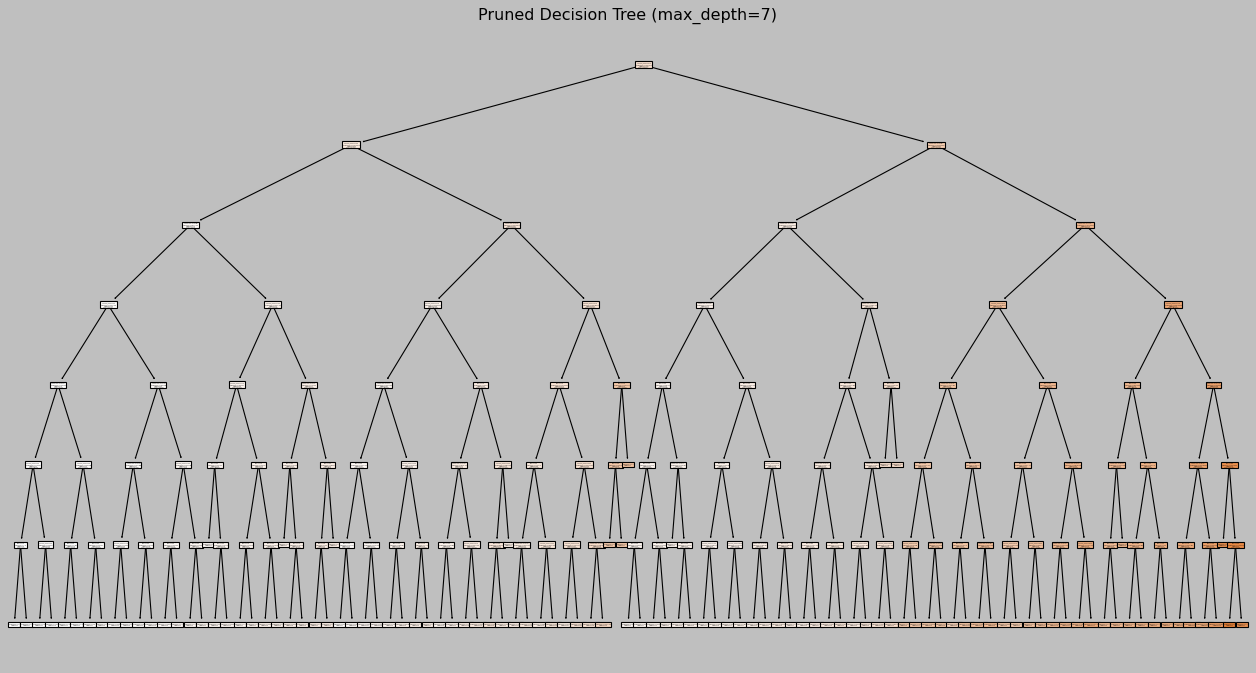

In [80]:
# Fit and plot the model.

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Initialize the DecisionTreeRegressor with max_depth of 7
pruned_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)

# Fit the model on the training data
pruned_regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_regressor, feature_names=X_train.columns,filled=True)
plt.title("Pruned Decision Tree (max_depth=7)")

# Display the plot
plt.show() 

#### Observations
> - the metrics on the test and validation sets are similar, indicating that the model generalises well on new data.
> - no significant difference between metrics suggests model has not overfitted
> - r2 value of 0.98081 shows a higher level of predictive accuracy than the 5 depth model, and getting close to the unpruned model r2 of 0.9969
> - The amount of error has dropped compared to models depths of 3 and 5, but still higher than the unpruned model
> - the decision tree is more complex to models depths of 3 and 5, but still considerably less complex han the unpruned decision tree
> - Will investigate greater depth of 9 to see if R2 and error figures can be improved  

#### Prune model to max depth 9

In [83]:
# Create your decision tree regressor.

# Initialize the DecisionTreeRegressor with pre-pruning parameters (controlled complexity)
regressor4 = DecisionTreeRegressor(max_depth=9,   # Limit the depth of the tree
                                  min_samples_leaf=5,  # Minimum number of samples per leaf node
                                  min_samples_split=5,  # Minimum number of samples required to split an internal node
                                  random_state=42)  # Set a random state for reproducibility

# Fit the regressor object to the data set.
regressor4.fit(X_train,y_train)  

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [84]:
# Evaluate the model on the test set.
y_test_predict_pruned_9 = regressor4.predict(X_test)  

# Calculate metrics for the test set
mae_test_pruned_9 = metrics.mean_absolute_error(y_test, y_test_predict_pruned_9)
mse_test_pruned_9 = metrics.mean_squared_error(y_test, y_test_predict_pruned_9)
rmse_test_pruned_9 = math.sqrt(metrics.mean_squared_error(y_test, y_test_predict_pruned_9))
r2_test_pruned_9 = r2_score(y_test, y_test_predict_pruned_9)

# Print the metrics for the test set
print(f"Test Metrics:\nMean Absolute Error: ", mae_test_pruned_9)
print("Mean Squared Error: ", mse_test_pruned_9)
print("Root Mean Squared Error: ", rmse_test_pruned_9)
print(f"R-squared: {r2_test_pruned_9}")

Test Metrics:
Mean Absolute Error:  86.64061363568071
Mean Squared Error:  20983.431898924493
Root Mean Squared Error:  144.8565908025054
R-squared: 0.9881332474086205


In [85]:
# Compare with the validation set
y_val_predict_pruned_9 = regressor4.predict(X_val)

# Calculate metrics for the validation set
mae_val_pruned_9 = metrics.mean_absolute_error(y_val, y_val_predict_pruned_9)
mse_val_pruned_9 = metrics.mean_squared_error(y_val, y_val_predict_pruned_9)
rmse_val_pruned_9 = math.sqrt(metrics.mean_squared_error(y_val, y_val_predict_pruned_9))
r2_val_pruned_9 = r2_score(y_val, y_val_predict_pruned_9)

# Print the metrics for the validation set
print(f"Test Metrics:\nMean Absolute Error: ", mae_val_pruned_9)
print("Mean Squared Error: ", mse_val_pruned_9)
print("Root Mean Squared Error: ", rmse_val_pruned_9)
print(f"R-squared: {r2_val_pruned_9}")

Test Metrics:
Mean Absolute Error:  90.69484507115608
Mean Squared Error:  21096.22716294067
Root Mean Squared Error:  145.24540324203267
R-squared: 0.9855022800543892


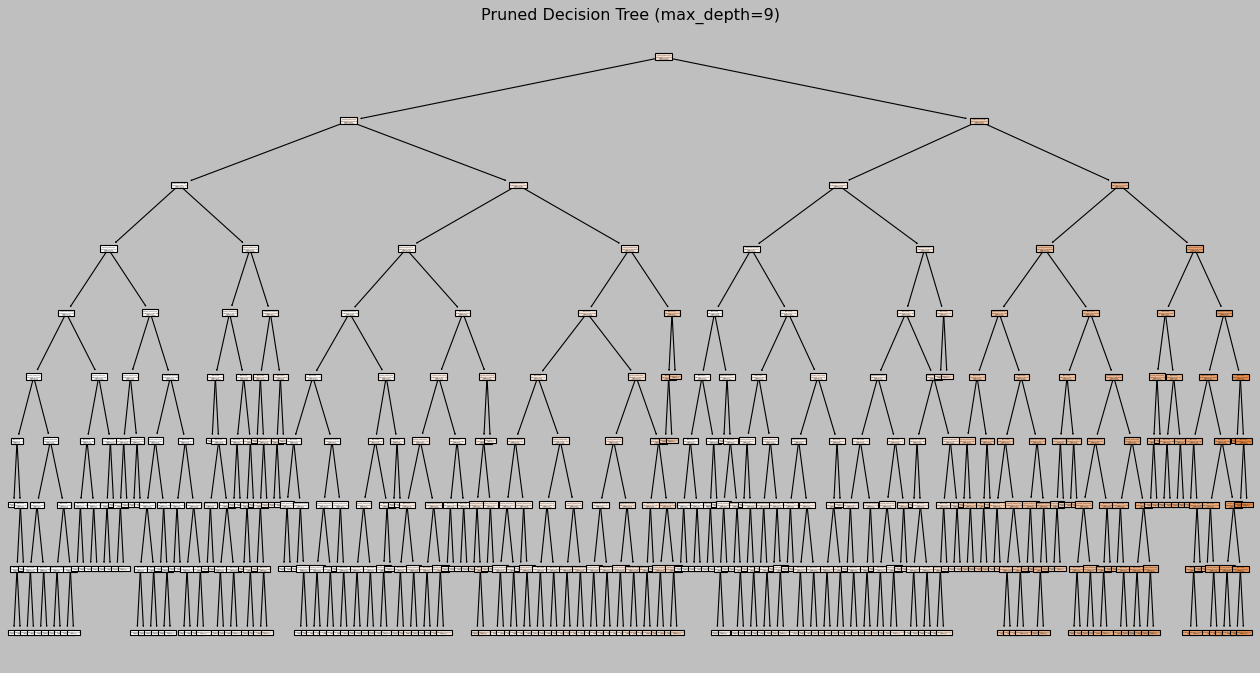

In [86]:
# Fit and plot the model.

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Initialize the DecisionTreeRegressor with max_depth of 9
pruned_regressor = DecisionTreeRegressor(max_depth=9, random_state=42)

# Fit the model on the training data
pruned_regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_regressor, feature_names=X_train.columns,filled=True)
plt.title("Pruned Decision Tree (max_depth=9)")

# Display the plot
plt.show() 

#### Observations
> - the metrics on the test and validation sets are similar, indicating that the model generalises well on new data.
> - no significant difference between metrics suggests model has not overfitted
> - r2 value of 0.9881 shows a marginally higher level of predictive accuracy than the 7 depth model, and closer to the unpruned model r2 of 0.9969
> - The amount of error has dropped compared to models depths of 3, 5 and 7, but still higher than the unpruned model
> - the decision tree is more complex to models depths of 3, 5 and7 but still considerably less complex han the unpruned decision tree

#### viii).Compared the unpruned and pruned metrics

In [89]:

# Store the metrics in a DataFrame for comparison
comparison_metrics = pd.DataFrame({
    'Model': ['Unpruned Decision Tree', 'Pruned_3 Decision Tree', 'Pruned_5 Decision Tree','Pruned_7 Decision Tree','Pruned_9 Decision Tree'],
    'Mean Squared Error': [mse_test_unpruned, mse_test_pruned_3, mse_test_pruned_5, mse_test_pruned_7, mse_test_pruned_9],
    'Root Mean Squared Error': [rmse_test_unpruned, rmse_test_pruned_3, rmse_test_pruned_5, rmse_test_pruned_7, rmse_test_pruned_9],
    'Mean Absolute Error': [mae_test_unpruned, mae_test_pruned_3, mae_test_pruned_5, mae_test_pruned_7, mae_test_pruned_9],
    'R-squared': [r2_test_unpruned, r2_test_pruned_3, r2_test_pruned_5, r2_test_pruned_7, r2_test_pruned_9]
})

# Display the comparison
print("\nComparison of Decision Tree Evaluation Metrics:\n")
print(comparison_metrics)



Comparison of Decision Tree Evaluation Metrics:

                    Model  Mean Squared Error  Root Mean Squared Error  \
0  Unpruned Decision Tree         5442.090000                73.770523   
1  Pruned_3 Decision Tree       146819.571383               383.170421   
2  Pruned_5 Decision Tree        75027.118780               273.910786   
3  Pruned_7 Decision Tree        33921.684329               184.178404   
4  Pruned_9 Decision Tree        20983.431899               144.856591   

   Mean Absolute Error  R-squared  
0            23.960000   0.996922  
1           279.895332   0.916969  
2           182.266856   0.957570  
3           117.079906   0.980816  
4            86.640614   0.988133  


#### ix). Final insights and observations from the decision tree analysis

The unpruned decision tree

> - has the lowest mean squared error (MSE) of 5442 compared to the pruned models, and the highest R-squared value of 0.9969
> - This suggests it best captures the nuances in the data, albeit potentially at the risk of overfitting.
> - However this analysis us conducted on a data set of 2000, and a decision tree of 21 depth is very complex which makes it harder to interpret and may be at risk of overfitting on a larger data set.
> - a simpler model with slightly worse performance may be preferable for Turtle Games, which will be easier to interpret and react better with new data.

The pruned decision tree (depth 3)

> - pruning to a tree depth of 3 significantly increases the mean squared error (RMSE) to 146,819 and reduces the R-squared metric to 0.916
> - This suggests that limiting the tree depth to 3 has made the model too simplistic.

The pruned decision tree (depth 7)

> - While the unpruned model performs better statistically, depth of 7 appears to be a good option for the following reasons:
> - the r2 of 0.9808 and mean squared error (MSE) of 33,921 are relatively good compared to the tree depth models of 3 and 5. 
> - while the unpruned model and the decision tree depth 9 result in higher r2 and lower mean square error (MSE) metrics they add more complexity, therefore harder to interpret, and also have a higher risk of overfitting on new data.
>

How to interpret the pruned decision tree (depth 7)
> - the tree splits first on 67 spending score <= 67.0, then on renumeration level <= 43.87, then on renumeration <= 74.21.
> - This suggests the following:
> - the tree first splits on spending score suggesting that this is the most critical factor in predicting loyalty point accumulation.
> - A threshold of 67 indicates a key dividing line between different customer behaviours.
> - Customers with a spending score above 67 and remuneration above 74.21 are the most valuable, likely accumulating the most loyalty points.
> - The decision tree reveals that both spending score and remuneration are crucial in predicting loyalty point accumulation
> - tree’s structure emphasises the importance of segmentation (focusing on spending score and remuneration) in understanding customer behavior 

#### x). Display the final plot (and increase readability)

In [10]:
# Fit and plot the model.

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Initialize the DecisionTreeRegressor with max_depth of 7
pruned_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)

# Fit the model on the training data
pruned_regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(30,15))
plot_tree(pruned_regressor, 
          feature_names=X_train.columns,
          filled=True,
          max_depth=7,
          fontsize=10)
plt.title("Pruned Decision Tree (max_depth=7)")

# Save the plot as a PNG file
plt.savefig('decision_tree_depth_7.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


NameError: name 'X_train' is not defined

# 3: How does this help to understanding Turtle Games customers?

> - 3a Applying K-means clustering to segment customers based on remuneration and spending score.
> - 3b Natural language processing, Text and sentiment analysis

## 3a) Applying K Means clustering

#### i). Load and explore the data

In [79]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews_new.csv')

# View DataFrame.
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [81]:
# Drop unnecessary columns.
df3 = df2[['remuneration','spending_score']]

# View DataFrame.
df3.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [83]:
# Explore the data.
# Determine the number of null values.
df3.isnull().sum()

remuneration      0
spending_score    0
dtype: int64

In [85]:
# Descriptive statistics.
# Determine descriptive statistics.
df3.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

#### ii). Plot the data

<Axes: xlabel='remuneration', ylabel='spending_score'>

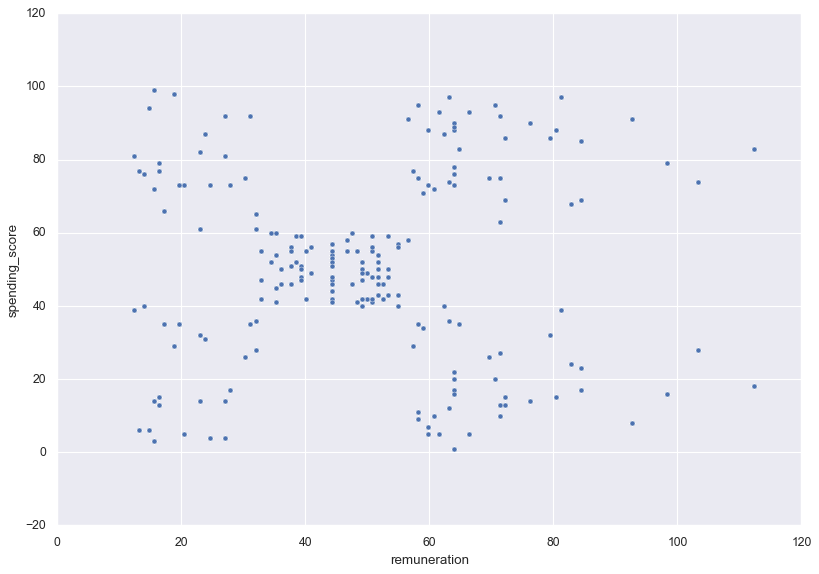

In [87]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df3)

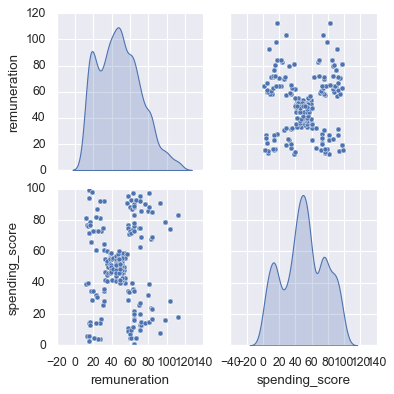

In [89]:
# Create a pairplot with Seaborn.
x = df3[['remuneration', 'spending_score']]

sns.pairplot(df3,
             vars=x,
             diag_kind='kde')

#### iii). Elbow and silhoutte methods

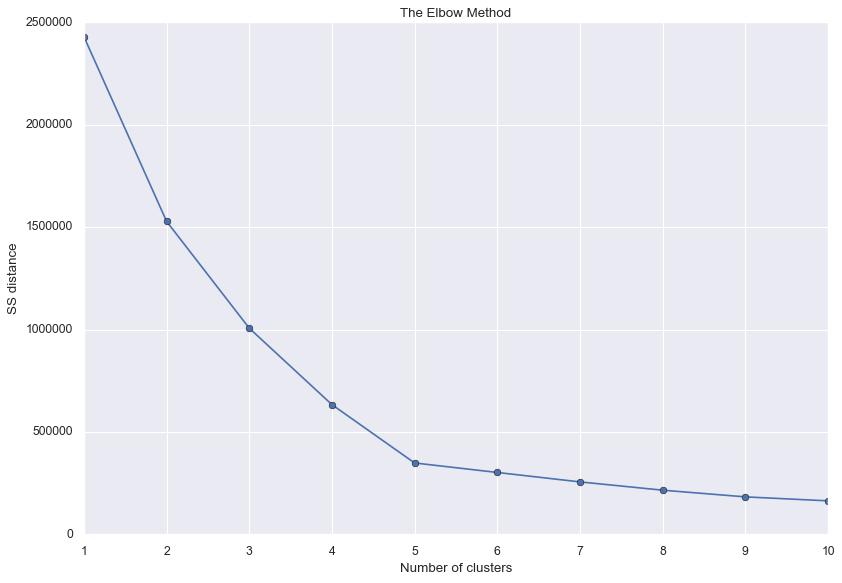

In [91]:
# Determine the number of clusters: Elbow method.

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

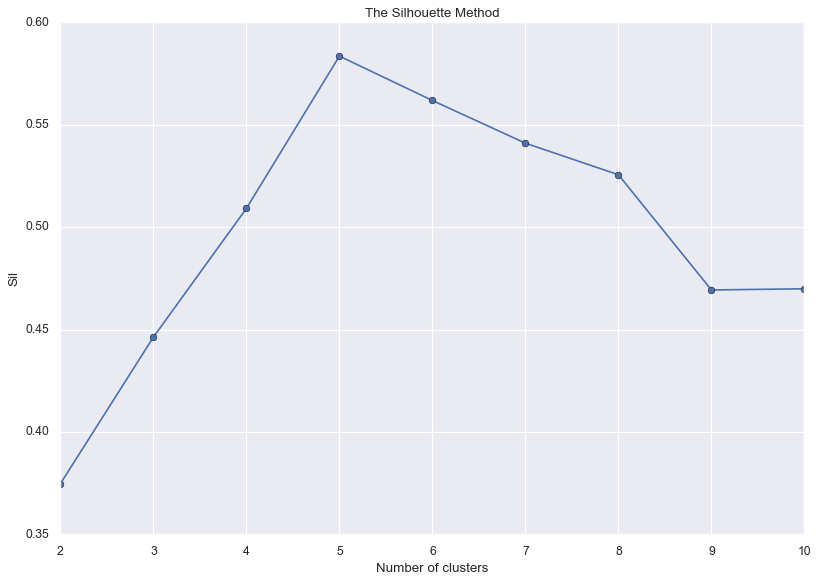

In [93]:
# Determine the number of clusters: Silhouette method.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

> - both elbow and silhoutette mtehods suggesting 5 clusters as the optimal starting point

#### iv). Evaluate k-means model at different values of *k*

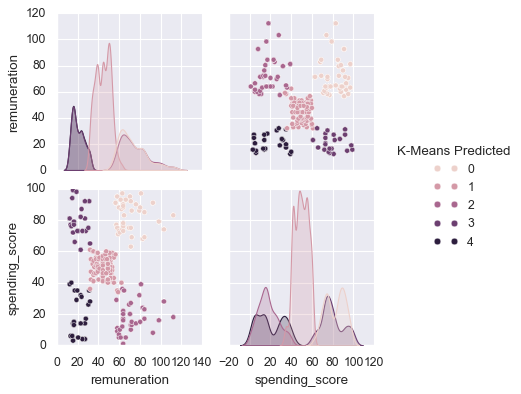

In [95]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [97]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

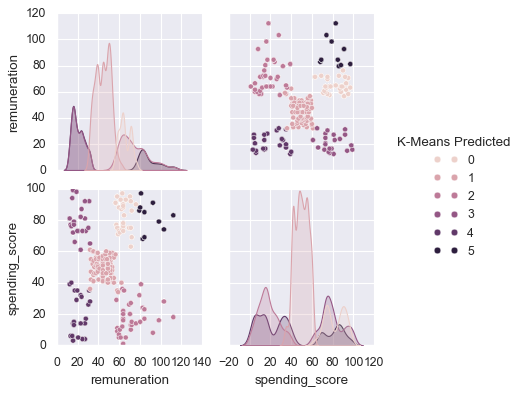

In [99]:
# Use Six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [101]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
2    330
4    271
3    269
0    238
5    118
Name: count, dtype: int64

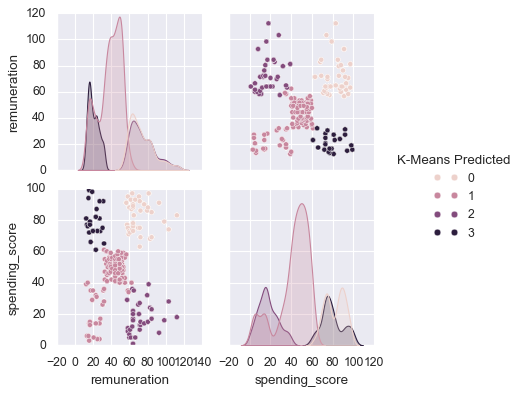

In [103]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [105]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    1045
0     356
2     330
3     269
Name: count, dtype: int64

#### v). Fit final model and justify your choice

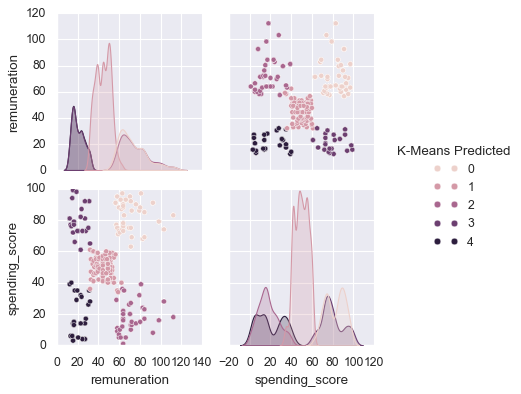

In [107]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [109]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

In [254]:
# Assign Cluster Labels to the data set:

reviews_new['cluster'] = clusters

In [252]:
# Save the Updated DataFrame to a CSV File

# Save the updated DataFrame with the new 'cluster' column to a CSV file
reviews_new.to_csv('reviews_new_5_clusters.csv', index=False)

#### vi). Plot and interpret the clusters

In [117]:
# Visualising the clusters.

# View the DataFrame.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<Axes: xlabel='remuneration', ylabel='spending_score'>

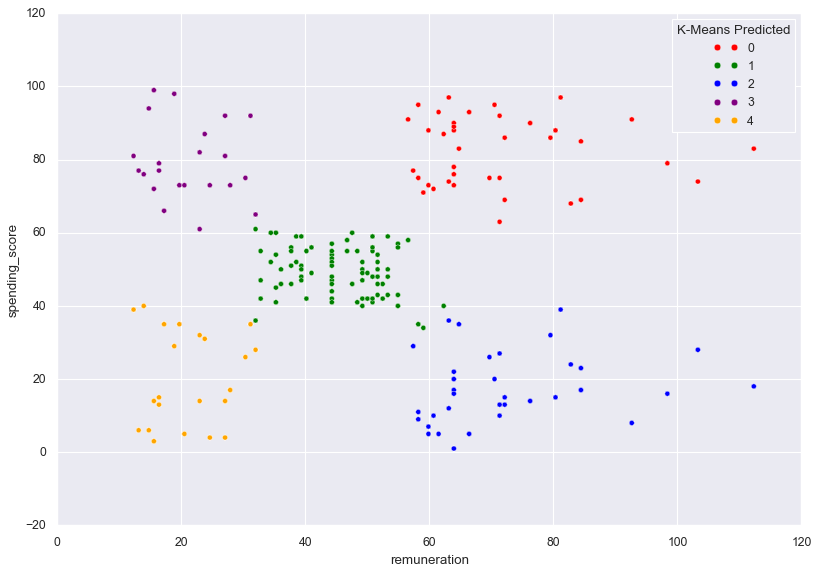

In [119]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'purple', 'orange'])


#### vii). Discuss: Insights and observations


The result of the K-Means clustering identified 5 clusters / 5 distinct segments based on remuneration and spending score.

Initial observations of the segments
> - Cluster 0 - "High Spenders" combination of high spending and remuneration indicates that these customers are valuable.
> - Cluster 1 - "Moderate earners" make up the largest portion of the sample data set (774 customers). Should this pattern repeat on larger data set, Turtle Games may want to consider positioning certain products that appeal specifically to their profile when conducting product sales 
> - Cluster 2 - "Low Spenders, High Earners" - low spending score but high average remuneration suggests potential for growth if Turtle games marketing strategies can encourage spending among this segment.
> - Cluster 3 - "Value Seekers" high spenders but lower remuneration, could suggest these customers seem to seek value, possibly making purchases during promotions or discounts.
> - Cluster 4 - "Budget Conscious" - Low spending score and remuneration indicating they might be more price-sensitive.
 > these segments can help Turtle Games predict customer behaviour, enabling more accurate forecasting and analysis of spending patterns

 Established names from these 5 clusters based on each clusters attributes that could help with customer segmentation
> - Cluster 0 - high remuneration and high spending score, “high spenders”
> - Cluster 1 - mid remuneration, mid spending score - “moderate earners”
> - Cluster 2 - high remuneration and low spending score - “low spenders, high income”
> - Cluster 3 - high spending score, low remuneration - “value seekers”
> - Cluster 4 - low spending score, low remuneration - “budget conscious”

To conduct further exploratory data analysis on these cluster in R, to include:
> - What are the common demographic characteristics of customers in each cluster?
> - How does the customer feedback differ in relation to each cluster?

## 3b): Natural language processing, text and sentiment analysis

#### i). Load and explore the data

In [123]:
# Load the data set as df4.
df4 = pd.read_csv('reviews_new.csv')

# View DataFrame.
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [125]:
# Explore data set.
df4.describe()

age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [127]:
# Keep necessary columns. Drop unnecessary columns.
df5 = df4[['review','summary']]

# View DataFrame.
df5.head()


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [129]:
# Determine if there are any missing values.
df5.isnull().sum()

review     0
summary    0
dtype: int64

### ii. Prepare the data for NLP
####  i) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [132]:
# Review: Change all to lower case and join with a space.
df5['review'] = df5['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df5['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [132]:
# Summary: Change all to lower case and join with a space.
df5['summary'] = df5['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df5['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

#### ii) Replace punctuation in each of the columns respectively (review and summary)

In [134]:
# Replace all the punctuations in review column.
df5['review'] = df5['review'].str.replace('[^\w\s]','', regex=True)

# Preview the result.
df5['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [136]:
# Replace all the puncuations in summary column.
df5['summary'] = df5['summary'].str.replace('[^\w\s]','', regex=True)

# Preview the result.
df5['summary'].head()

0    The fact that 50 of this space is wasted on ar...
1    Another worthless Dungeon Masters screen from ...
2                       pretty but also pretty useless
3                                           Five Stars
4                                           Money trap
Name: summary, dtype: object

#### iii) Drop duplicates in both columns

In [138]:
# Check the number of duplicate values in the review & summary columns.
print(df5[['review','summary']].duplicated().sum())

# Drop duplicates in both columns.
df6 = df5.drop_duplicates(subset=['review','summary'])

# View DataFrame.
df6.reset_index(inplace=True)
print(df6.head())

39
   index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  The fact that 50 of this space is wasted on ar...  
1  Another worthless Dungeon Masters screen from ...  
2                     pretty but also pretty useless  
3                                         Five Stars  
4                                         Money trap  


In [140]:
# Check the number of duplicate values in the review & summary columns.
print(df6[['review','summary']].duplicated().sum())

0


### iii). Tokenise and create wordclouds

In [142]:
# Create new DataFrame (copy DataFrame).
df7=df6.copy()

# View DataFrame.
df7.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  The fact that 50 of this space is wasted on ar...  
1  Another worthless Dungeon Masters screen from ...  
2                     pretty but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [144]:
# Apply tokenisation to both columns.
df7['review_tokens'] = df7['review'].apply(word_tokenize)
df7['summary_tokens'] = df7['summary'].apply(word_tokenize)

# View DataFrame.
print(df7['review_tokens'].head())
print(df7['summary_tokens'].head())

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object
0    [The, fact, that, 50, of, this, space, is, was...
1    [Another, worthless, Dungeon, Masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [Five, Stars]
4                                        [Money, trap]
Name: summary_tokens, dtype: object


In [146]:
# Review: Create a word cloud.
# Define an empty list of tokens
all_review_tokens = []
for i in range(df7.shape[0]):
     # Add each comment.
       all_review_tokens = all_review_tokens + df7['review_tokens'][i]

# Convert the list of tokens back into a single string (required by WordCloud)
all_review_tokens_string = ' '.join(all_review_tokens)

In [148]:
# Import along with matplotlib and seaborn for visualisation.

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review_tokens_string) 

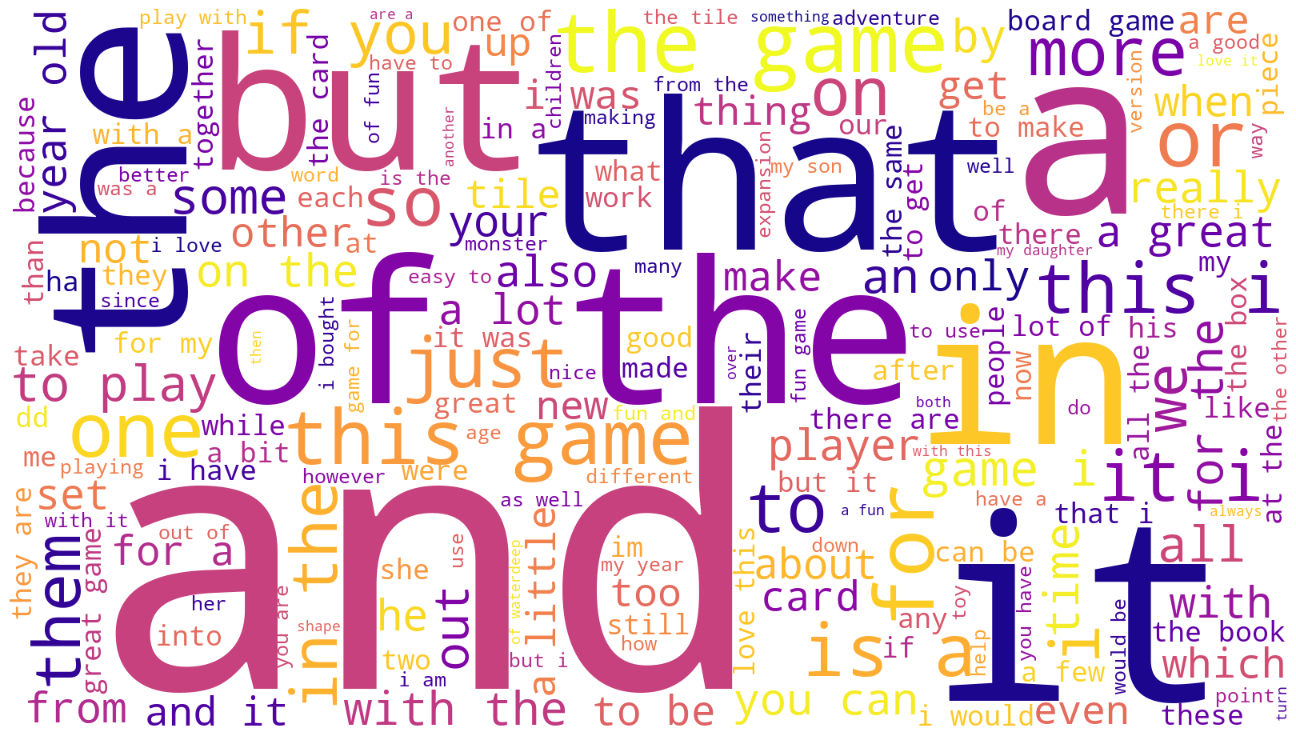

In [149]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [155]:
# Summary: Create a word cloud.
# Define an empty list of tokens
all_summary_tokens = []
for i in range(df7.shape[0]):
     # Add each comment.
       all_summary_tokens = all_summary_tokens + df7['summary_tokens'][i]

# Convert the list of tokens back into a single string (required by WordCloud)
all_summary_tokens_string = ' '.join(all_summary_tokens)

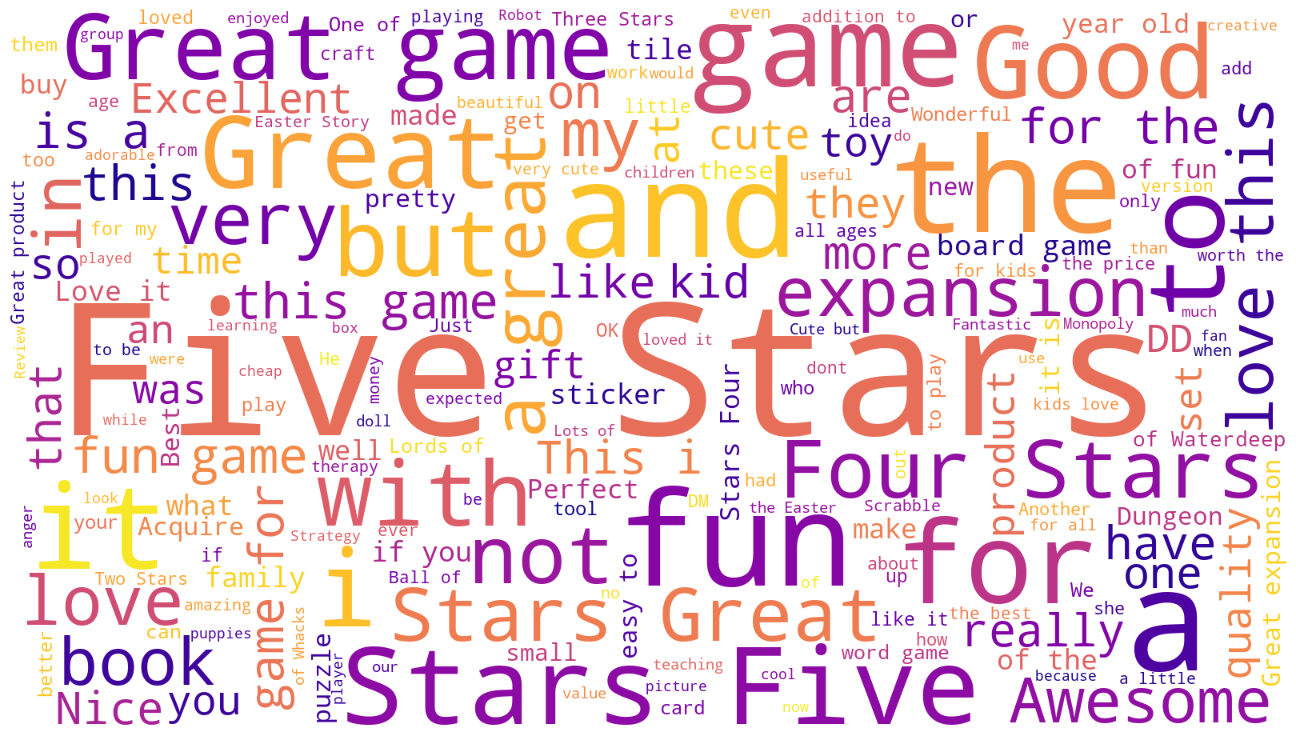

In [157]:
# Summary: Plot the WordCloud image.

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary_tokens_string) 

# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

Insights and Obserations
> - These word clouds have a lot of stopwords making them not as insightful as they could be

### 3d. Frequency distribution and polarity
#### i) Create frequency distribution

In [159]:
# Determine the frequency distribution.

# Calculate the frequency distribution.
fdist_review = FreqDist(all_review_tokens)
fdist_summary = FreqDist(all_summary_tokens)

# Preview data.
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [161]:
# Preview data.
fdist_summary

FreqDist({'Stars': 423, 'Five': 340, 'game': 262, 'for': 224, 'the': 213, 'Great': 202, 'to': 190, 'a': 176, 'and': 168, 'of': 137, ...})

### ii) Remove alphanumeric characters and stopwords

In [163]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_review = [word for word in all_review_tokens if word.isalnum()]
tokens_summary = [word for word in all_summary_tokens if word.isalnum()]

In [167]:
# Review: Remove all the stopwords

# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2_review = [x for x in tokens_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_review_string = ''

for value in tokens2_review:
    # Add each filtered token word to the string.
    tokens2_review_string = tokens2_review_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henrypescod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
# Summary: Remove all the stopwords

# Create a filtered list of tokens without stopwords.
tokens2_summary = [x for x in tokens_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_summary_string = ''

for value in tokens2_summary:
    # Add each filtered token word to the string.
    tokens2_summary_string = tokens2_summary_string + value + ' '

#### iii) Create wordcloud without stopwords

In [171]:
# Review: Create a wordcloud without stop words.

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_review_string) 


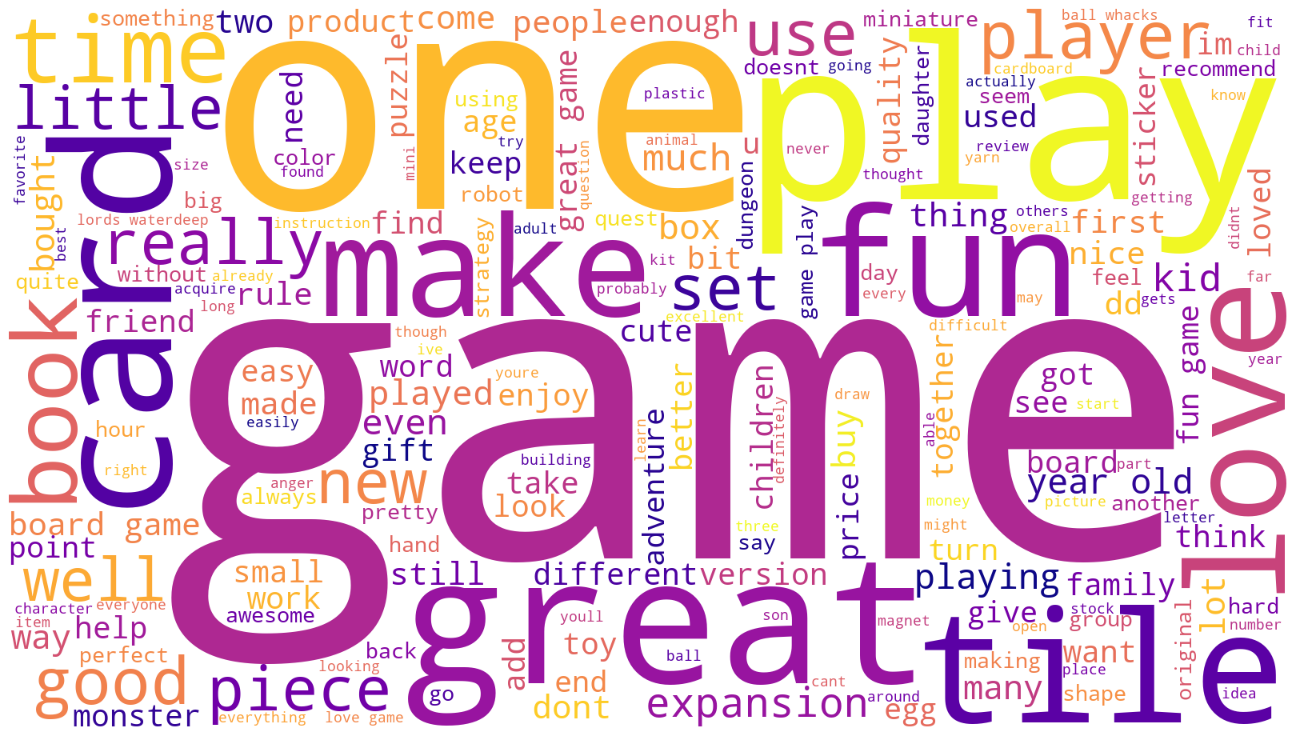

In [172]:
# Review: Plot the wordcloud image.
                       
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


In [173]:
# Summary: Create a wordcloud without stop words.

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_summary_string) 

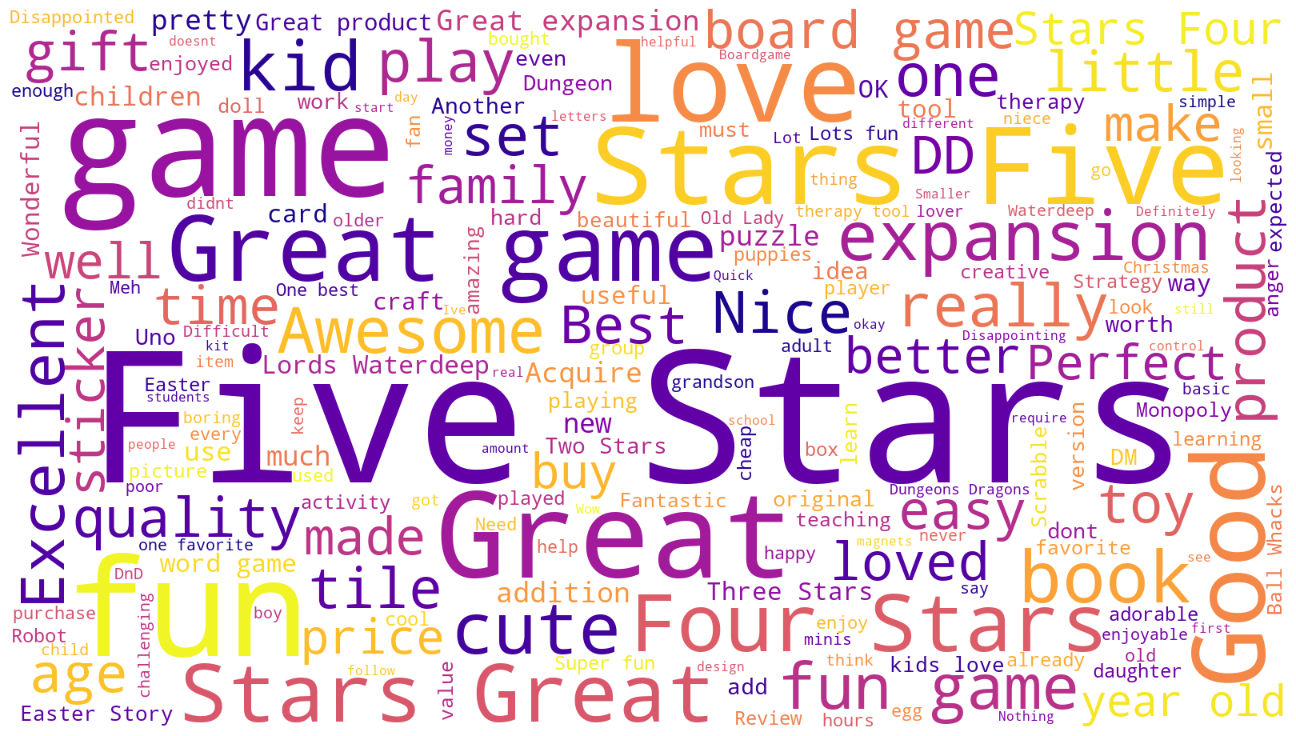

In [176]:
# Summary: Plot the wordcloud image.
                       
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

#### iv) Identify 15 most common words and polarity (without stopwords)

In [179]:
# Calculate the frequency distribution.
fdist_review2 = FreqDist(tokens2_review)
fdist_summary2 = FreqDist(tokens2_summary)

# Preview data.
fdist_review2

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [181]:
# Preview data.
fdist_summary2

FreqDist({'Stars': 423, 'Five': 340, 'game': 262, 'Great': 202, 'fun': 126, 'great': 90, 'Fun': 85, 'Four': 57, 'Game': 55, 'Good': 49, ...})

In [184]:
# Review: Determine the 15 most common words.

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

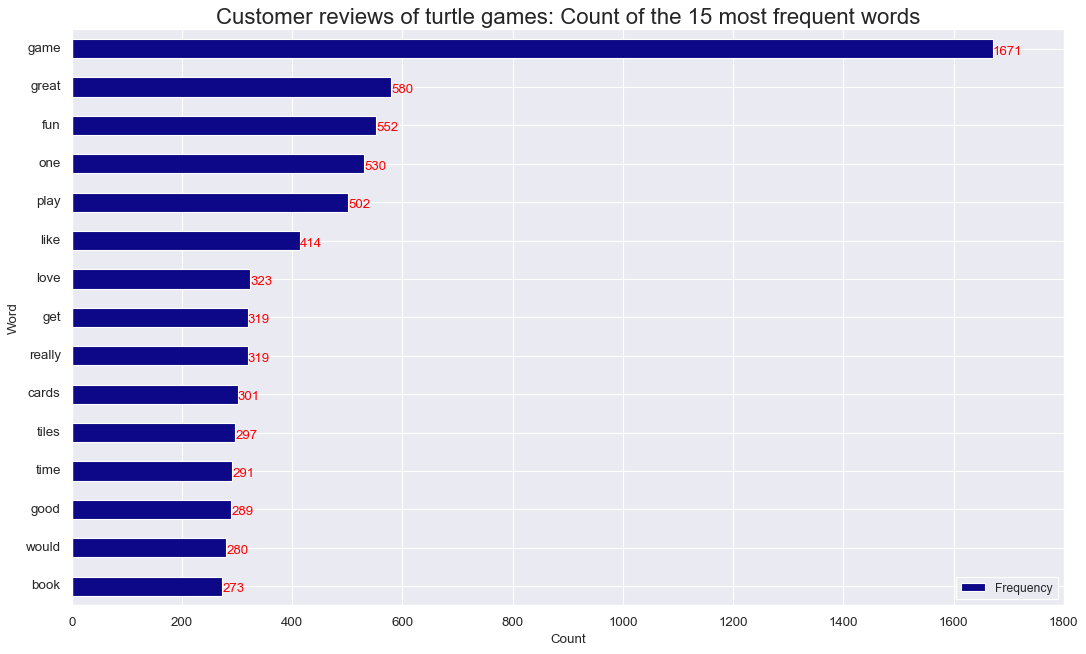

In [186]:
# Review: Bar chart of 15 most frequent words

# Sort the DataFrame by 'Frequency' in descending order
counts_review_sorted = counts_review.sort_values(by='Frequency', ascending=True)

# Set the plot type.
ax = counts_review_sorted.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews of turtle games: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [194]:
# Summary: Determine the 15 most common words.

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens2_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Sort the DataFrame by 'Frequency' in descending order
counts_summary = counts_summary.sort_values(by='Frequency', ascending=False)

# Preview data.
counts_summary

Frequency
Word                
Stars            423
Five             340
game             262
Great            202
fun              126
great             90
Fun               85
Four              57
Game              55
Good              49
like              49
love              47
good              43
Love              39
expansion         38

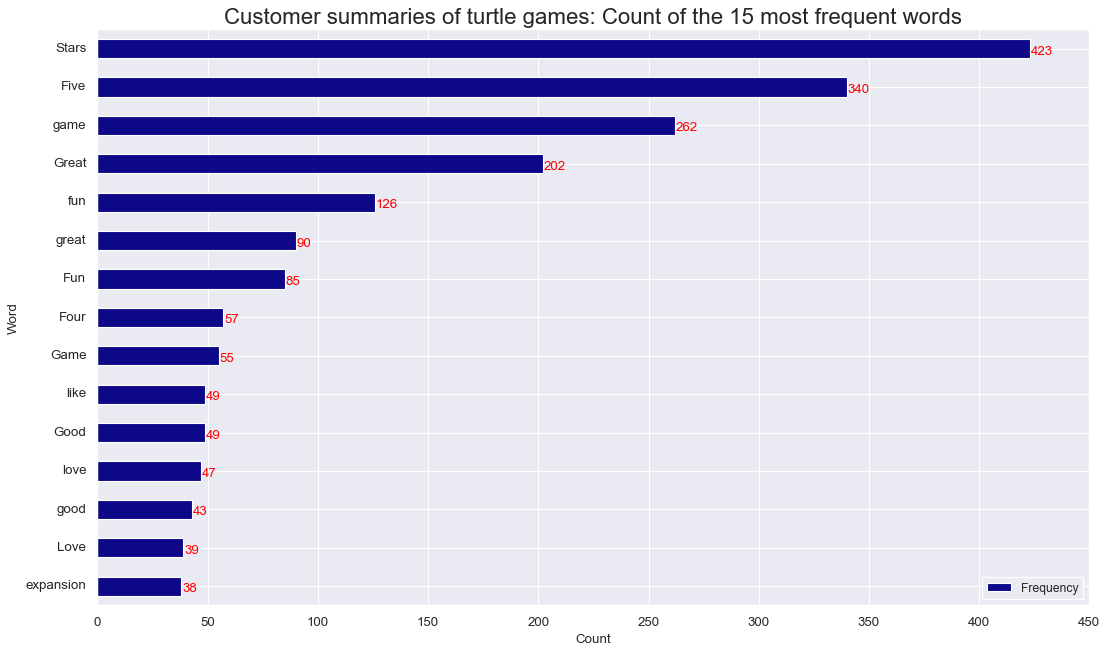

In [196]:
# Summary: Bar chart of 15 most frequent words

# Sort the DataFrame by 'Frequency' in descending order
counts_summary_sorted = counts_summary.sort_values(by='Frequency', ascending=True)

# Set the plot type.
ax = counts_summary_sorted.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer summaries of turtle games: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### iv). Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [198]:
# Create function to generate polarity score  
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [200]:
# Determine polarity of both columns. 

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df6['review_polarity'] = df6['review'].apply(generate_polarity)
df6['summary_polarity'] = df6['summary'].apply(generate_polarity)

# Preview the result.
df6['review_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [202]:
# Preview the result.
df6['summary_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

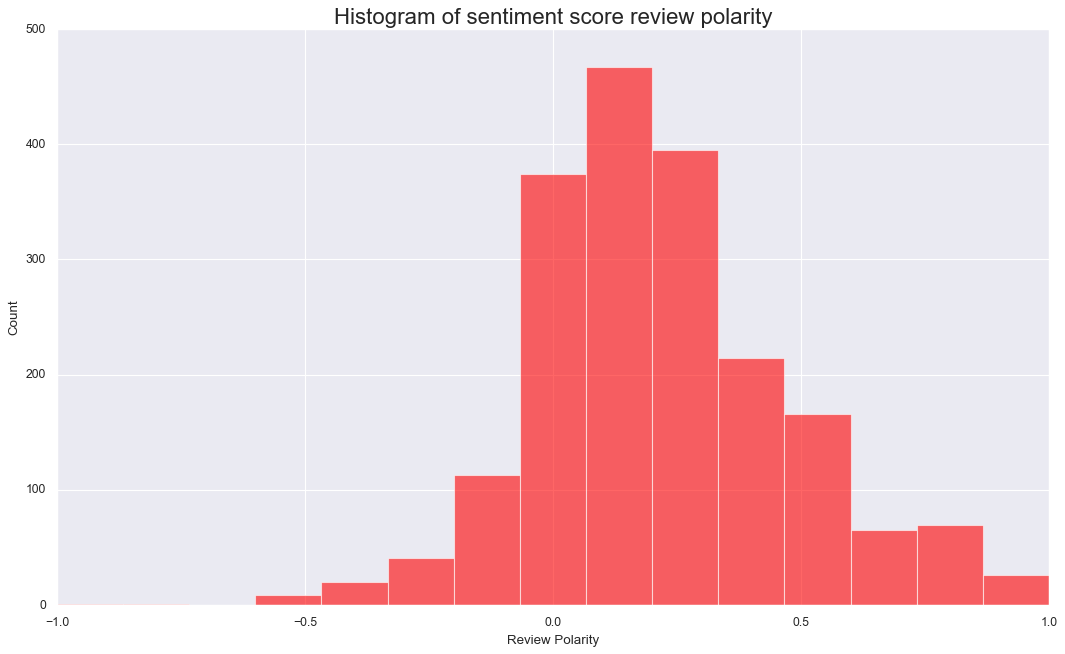

In [171]:
# Review: Create a histogram plot with bins = 15.

# Histogram of polarity - review

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df6['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score review polarity', fontsize=20)

plt.show()

# Histogram of sentiment score


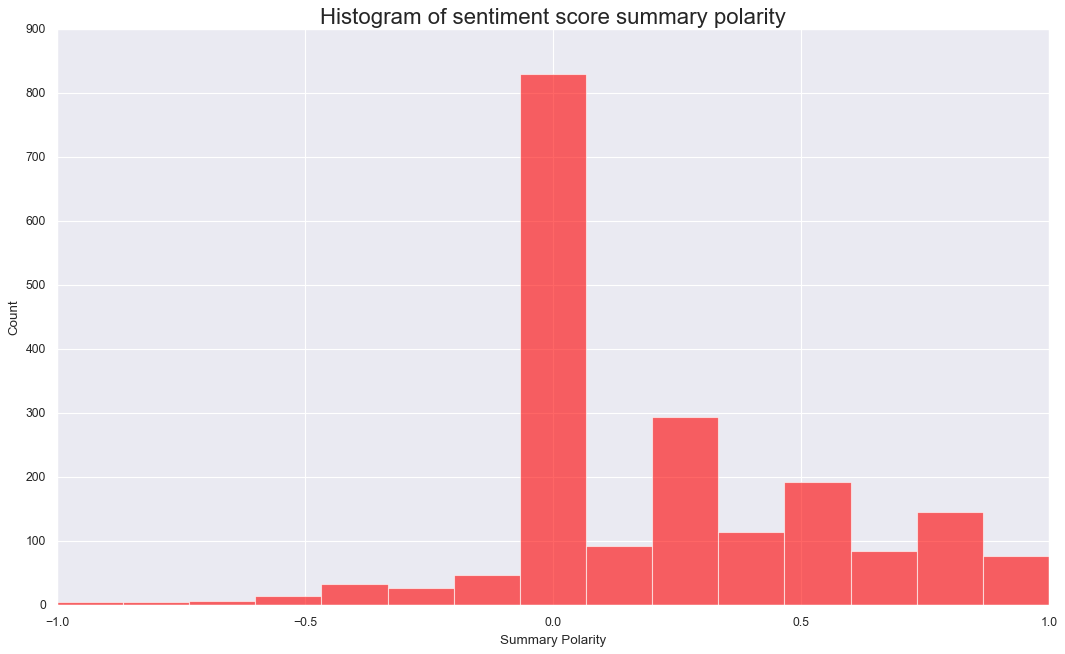

In [206]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df6['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score summary polarity', fontsize=20)

# Histogram of sentiment score
plt.show()




### v). Identify top 20 positive and negative reviews and summaries respectively

In [174]:
df6.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  review_polarity  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   summary_polarity  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

In [175]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment_reviews = df6.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
negative_sentiment_reviews = negative_sentiment_reviews[['review', 'review_polarity']]

# Adjust the column width and view output
negative_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

In [176]:
# Top 20 negative summaries.

# Create a DataFrame.
negative_sentiment_summaries = df6.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
negative_sentiment_summaries = negative_sentiment_summaries[['summary', 'summary_polarity']]

# Adjust the column width and view output
negative_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})


In [208]:
# Top 20 positive reviews.

# Create a DataFrame.
positive_sentiment_reviews = df6.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
positive_sentiment_reviews = positive_sentiment_reviews[['review', 'review_polarity']]

# Adjust the column width and view output
positive_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})


In [210]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment_summaries = df6.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
positive_sentiment_summaries = positive_sentiment_summaries[['summary', 'summary_polarity']]

# Adjust the column width and view output
positive_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})


### vi). Insights and observations



> - insights on sentiment is that there is more positive sentiment than negative sentiment for both reviews and summaries - evidenced by top 20 list. on negative list, polarity score increases significantly
> - summaries are slightly more negative than reviews evidence by polarity score for top 20

### vii). Additional analysis looking at the 5 clusters identified in the segmentation

What can be learnt from frequeny of words distbributions based on the clusters,
> - Cluster 0 - High Spenders
> - Cluster 1 - Moderate Earners
> - Cluster 2 - Low Spenders, High Income
> - Cluster 3 - Value Seekers
> - Cluster 4 - Budget-Conscious


In [212]:
# Check the structure of the DataFrames
print(df7.head())  
print(reviews_new.head())  

   index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  The fact that 50 of this space is wasted on ar...   
1  Another worthless Dungeon Masters screen from ...   
2                     pretty but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [

In [214]:
# Merge df7 and reviews_new based on their index
merged_df_cluster = pd.merge(df7, reviews_new, left_index=True, right_index=True, how='inner')

# Verify the merge
print(merged_df_cluster.head())


   index                                           review_x  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                           summary_x  \
0  The fact that 50 of this space is wasted on ar...   
1  Another worthless Dungeon Masters screen from ...   
2                     pretty but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [

In [216]:
# Display the columns of the merged DataFrame
print(merged_df_cluster.columns)

Index(['index', 'review_x', 'summary_x', 'review_tokens', 'summary_tokens',
       'gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review_y', 'summary_y', 'cluster'],
      dtype='object')


In [218]:
# Drop the redundant columns
merged_df_cluster = merged_df_cluster.drop(columns=['review_y', 'summary_y'])

# View the cleaned DataFrame
print(merged_df_cluster.columns)


Index(['index', 'review_x', 'summary_x', 'review_tokens', 'summary_tokens',
       'gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'cluster'],
      dtype='object')


In [220]:
# Function to remove stopwords from text
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in english_stopwords]  # Remove stopwords and non-alphanumeric tokens
    return ' '.join(filtered_tokens)

# Apply stopword removal to the reviews and summaries in the DataFrame
merged_df_cluster['cleaned_review'] = merged_df_cluster['review_x'].apply(remove_stopwords)
merged_df_cluster['cleaned_summary'] = merged_df_cluster['summary_x'].apply(remove_stopwords)


In [222]:
# create a chart of most frequent words for each cluster and compare (using facet)

# Function to calculate word frequencies
def calculate_word_frequencies(text_series, top_n=15):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(top_n)
    return pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Calculate word frequencies for Cluster 0
cluster_0_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 0]['cleaned_review']
cluster_0_word_counts = calculate_word_frequencies(cluster_0_reviews)

# Calculate word frequencies for Cluster 1
cluster_1_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 1]['cleaned_review']
cluster_1_word_counts = calculate_word_frequencies(cluster_1_reviews)

# Calculate word frequencies for Cluster 2
cluster_2_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 2]['cleaned_review']
cluster_2_word_counts = calculate_word_frequencies(cluster_2_reviews)

# Calculate word frequencies for Cluster 3
cluster_3_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 3]['cleaned_review']
cluster_3_word_counts = calculate_word_frequencies(cluster_3_reviews)

# Calculate word frequencies for Cluster 4
cluster_4_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 4]['cleaned_review']
cluster_4_word_counts = calculate_word_frequencies(cluster_4_reviews)


#### 
i) Text analysis by cluster

In [224]:
# Text analysis by cluster

# Calculate word frequencies for each cluster in the merged dataframe
cluster_word_freqs = {}
for cluster in merged_df_cluster['cluster'].unique():
    cluster_reviews = merged_df_cluster[merged_df_cluster['cluster'] == cluster]['cleaned_review']
    cluster_word_freqs[cluster] = calculate_word_frequencies(cluster_reviews)

# Display results
for cluster, freqs in cluster_word_freqs.items():
    print(f"Cluster {cluster} - Top 15 Words in Reviews:")
    print(freqs)
    print("\n")


Cluster 4 - Top 15 Words in Reviews:
     Word  Count
0    game    159
1     fun     82
2   great     68
3    play     64
4     one     55
5    love     49
6    like     47
7     get     38
8    good     38
9    kids     37
10   even     33
11    use     33
12   time     32
13    set     32
14  would     30


Cluster 3 - Top 15 Words in Reviews:
      Word  Count
0     game    179
1      fun     85
2     like     60
3      one     58
4    great     55
5     play     51
6     time     41
7     book     39
8     love     39
9   really     37
10   tiles     37
11   could     35
12   would     35
13     get     35
14     use     33


Cluster 1 - Top 15 Words in Reviews:
      Word  Count
0     game    857
1    great    242
2     play    240
3      one    237
4      fun    234
5    tiles    181
6     like    177
7    cards    166
8      new    145
9    board    144
10   games    143
11  really    138
12   would    137
13    love    135
14    good    134


Cluster 0 - Top 15 Words in Reviews

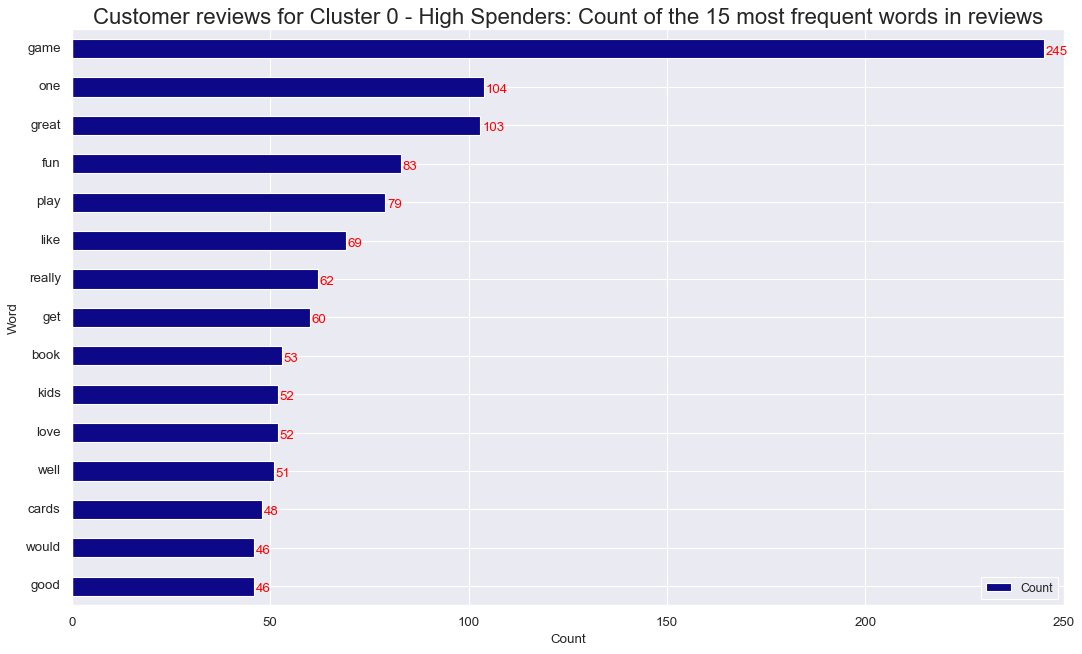

In [226]:
# Cluster 0 reviews: High Spenders

# Sort the DataFrame by 'Count' in descending order
cluster_0_word_counts_sorted = cluster_0_word_counts.sort_values(by='Count', ascending=True)

# Set the plot type.
ax = cluster_0_word_counts_sorted.plot(
    kind='barh', 
    x='Word',
    y='Count',
    figsize=(16, 9), 
    fontsize=12,
    colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews for Cluster 0 - High Spenders: Count of the 15 most frequent words in reviews",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Show the plot
plt.show()

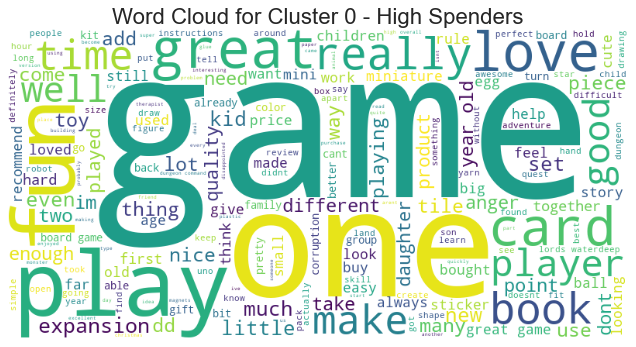

In [228]:
# Create a wordcloud for the Cluster 0 - High Spenders

# Filter the DataFrame for Cluster 0
cluster_0_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 0]['cleaned_review']

# Join all the reviews in Cluster 0 into a single string
cluster_0_text = ' '.join(cluster_0_reviews)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_0_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 0 - High Spenders', fontsize=20)
plt.show()


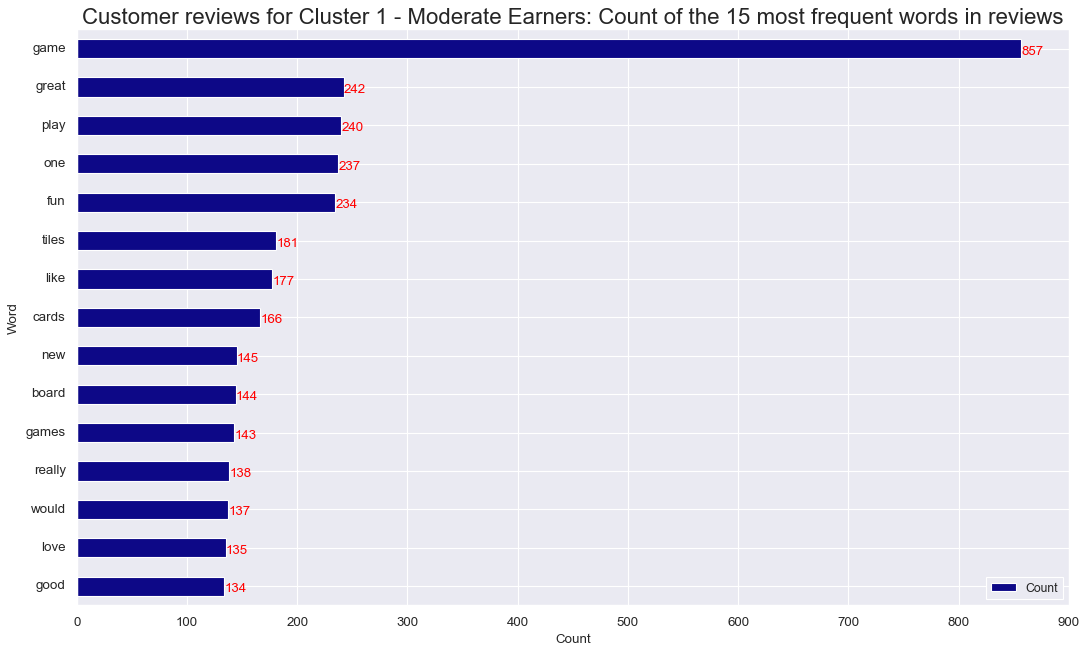

In [230]:
# Cluster 1 reviews: Moderate Earners

# Sort the DataFrame by 'Count' in descending order
cluster_1_word_counts_sorted = cluster_1_word_counts.sort_values(by='Count', ascending=True)

# Set the plot type.
ax = cluster_1_word_counts_sorted.plot(
    kind='barh', 
    x='Word',
    y='Count',
    figsize=(16, 9), 
    fontsize=12,
    colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews for Cluster 1 - Moderate Earners: Count of the 15 most frequent words in reviews",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Show the plot
plt.show()

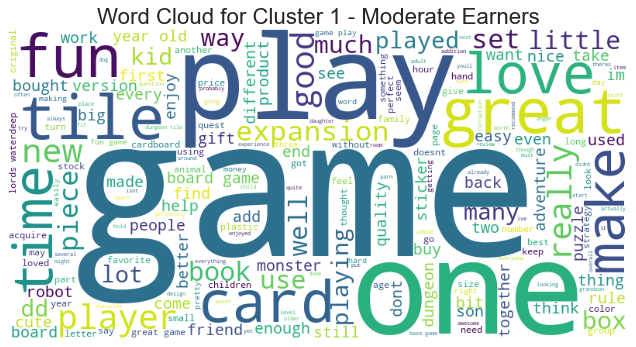

In [232]:
# Create a wordcloud for the Cluster 1 - Moderate Earners

# Filter the DataFrame for Cluster 1
cluster_1_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 1]['cleaned_review']

# Join all the reviews in Cluster 0 into a single string
cluster_1_text = ' '.join(cluster_1_reviews)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_1_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 1 - Moderate Earners', fontsize=20)
plt.show()


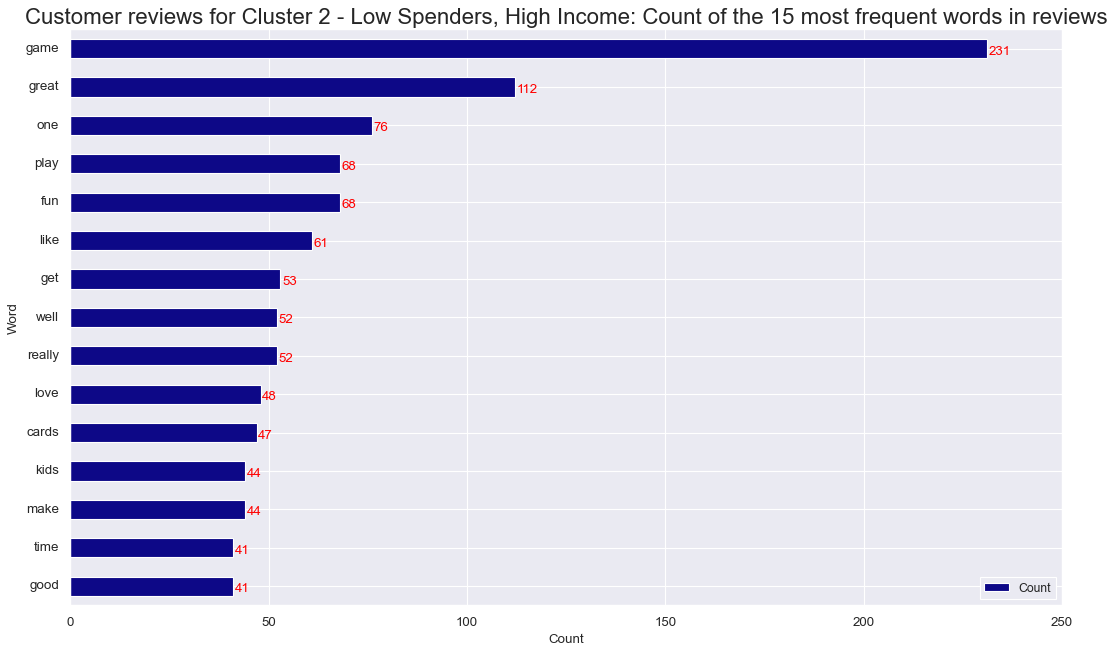

In [256]:
# Cluster 2 reviews: Low Spenders, High Income

# Sort the DataFrame by 'Count' in descending order
cluster_2_word_counts_sorted = cluster_2_word_counts.sort_values(by='Count', ascending=True)

# Set the plot type.
ax = cluster_2_word_counts_sorted.plot(
    kind='barh', 
    x='Word',
    y='Count',
    figsize=(16, 9), 
    fontsize=12,
    colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews for Cluster 2 - Low Spenders, High Income: Count of the 15 most frequent words in reviews",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Show the plot
plt.show()

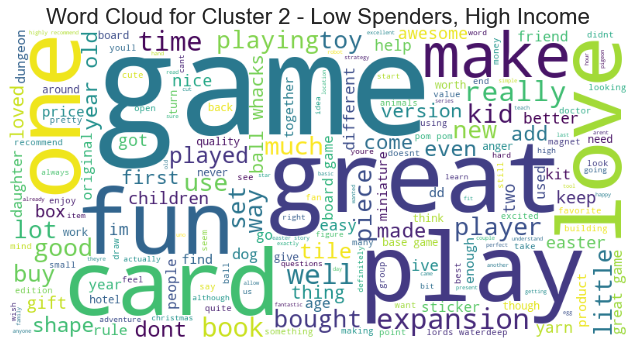

In [242]:
# Create a wordcloud for the Cluster 2 - Low Spenders, High Income 

# Filter the DataFrame for Cluster 2
cluster_2_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 2]['cleaned_review']

# Join all the reviews in Cluster 2 into a single string
cluster_2_text = ' '.join(cluster_2_reviews)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_2_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 2 - Low Spenders, High Income', fontsize=20)
plt.show()


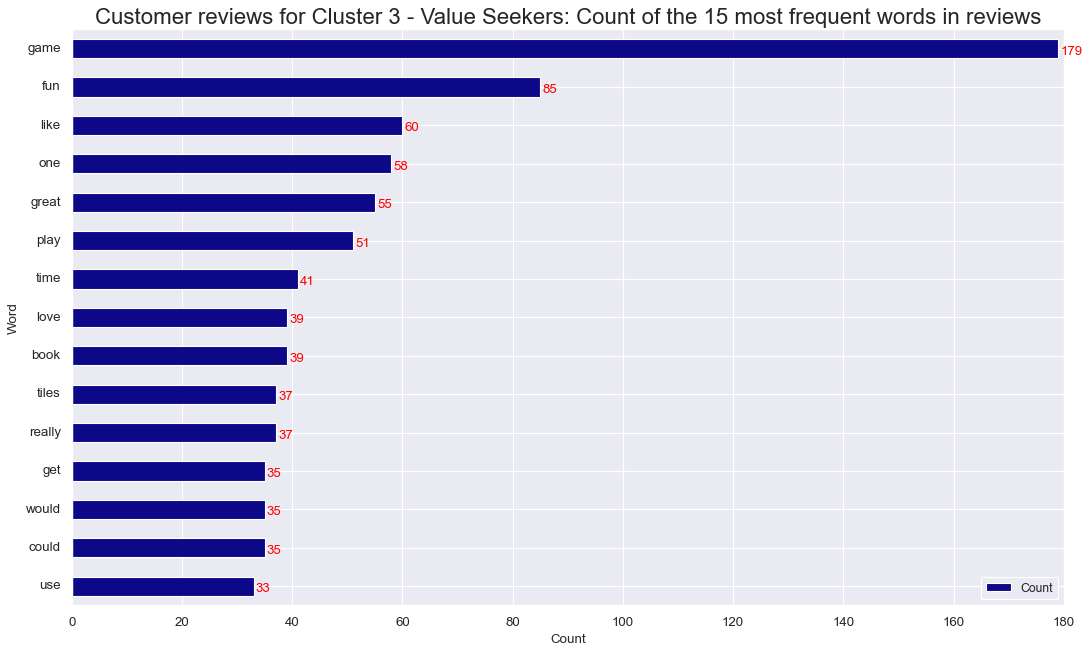

In [234]:
# Cluster 3 reviews: Value Seekers

# Sort the DataFrame by 'Count' in descending order
cluster_3_word_counts_sorted = cluster_3_word_counts.sort_values(by='Count', ascending=True)

# Set the plot type.
ax = cluster_3_word_counts_sorted.plot(
    kind='barh', 
    x='Word',
    y='Count',
    figsize=(16, 9), 
    fontsize=12,
    colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews for Cluster 3 - Value Seekers: Count of the 15 most frequent words in reviews",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Show the plot
plt.show()

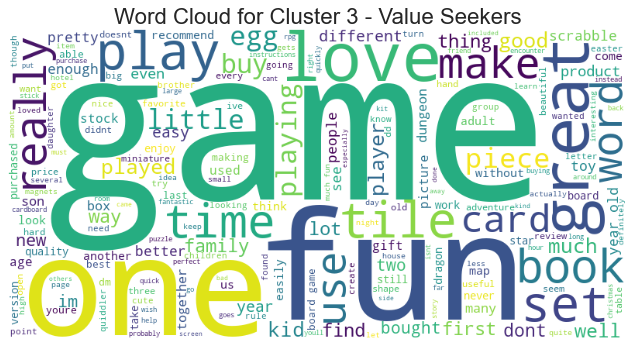

In [236]:
# Create a wordcloud for the Cluster 3 - Value Seekers 

# Filter the DataFrame for Cluster 3
cluster_3_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 3]['cleaned_review']

# Join all the reviews in Cluster 3 into a single string
cluster_3_text = ' '.join(cluster_3_reviews)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_3_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 3 - Value Seekers', fontsize=20)
plt.show()

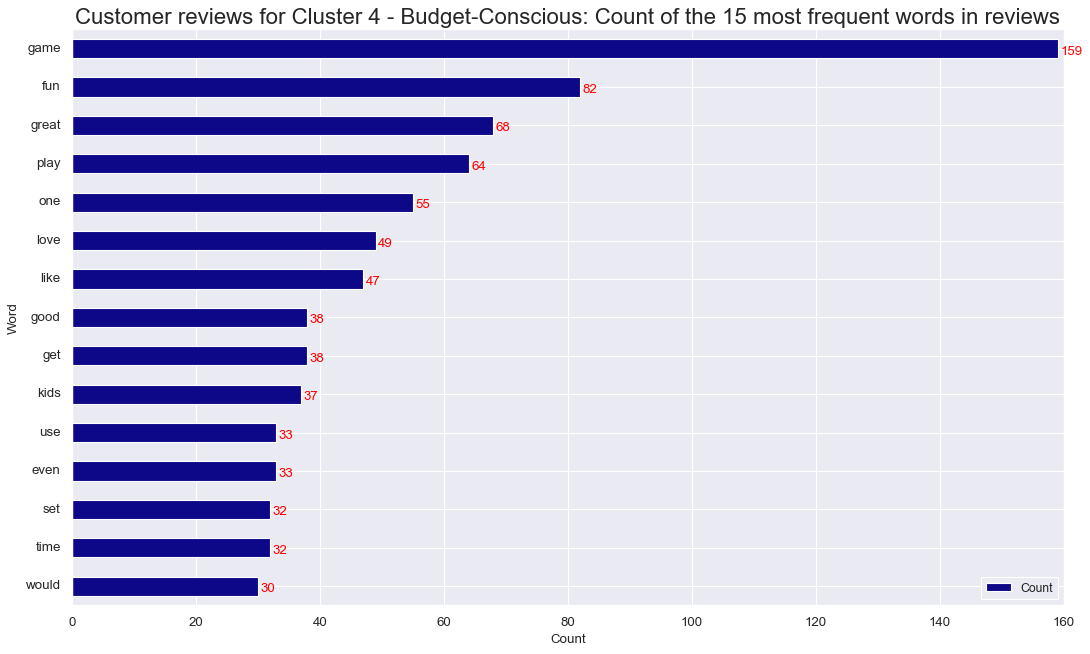

In [238]:
# Cluster 4 reviews: Budget-Conscious

# Sort the DataFrame by 'Count' in descending order
cluster_4_word_counts_sorted = cluster_4_word_counts.sort_values(by='Count', ascending=True)

# Set the plot type.
ax = cluster_4_word_counts_sorted.plot(
    kind='barh', 
    x='Word',
    y='Count',
    figsize=(16, 9), 
    fontsize=12,
    colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer reviews for Cluster 4 - Budget-Conscious: Count of the 15 most frequent words in reviews",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Show the plot
plt.show()

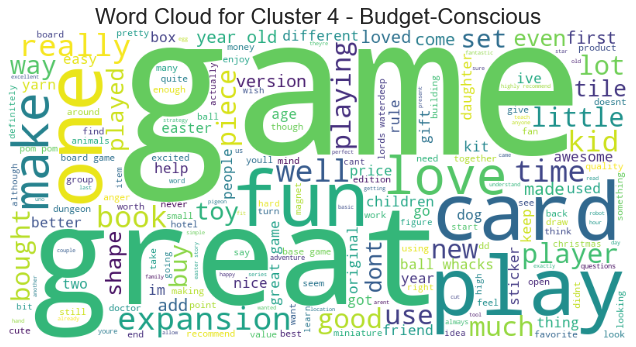

In [246]:
# Create a wordcloud for the Cluster 4 - Budget-Conscious

# Filter the DataFrame for Cluster 4
cluster_4_reviews = merged_df_cluster[merged_df_cluster['cluster'] == 4]['cleaned_review']

# Join all the reviews in Cluster 4 into a single string
cluster_4_text = ' '.join(cluster_4_reviews)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_2_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 4 - Budget-Conscious', fontsize=20)
plt.show()

In [248]:
# Combine clusters into one data frame to compare

# Add a 'Source' column to each DataFrame to identify the data source
cluster_0_word_counts['Source'] = 'High Spenders'
cluster_1_word_counts['Source'] = 'Moderate Earners'
cluster_2_word_counts['Source'] = 'Low Spenders, High Income'
cluster_3_word_counts['Source'] = 'Value Seekers'
cluster_4_word_counts['Source'] = 'Budget Conscious'

# Combine the data
combined_word_counts = pd.concat([cluster_0_word_counts, cluster_1_word_counts, cluster_2_word_counts, cluster_3_word_counts, cluster_4_word_counts])

# Ensure the data is sorted by 'Count' within each 'Source' category
combined_word_counts = combined_word_counts.groupby('Source').apply(
    lambda x: x.sort_values('Count', ascending=False)).reset_index(drop=True)



<Figure size 1280x960 with 0 Axes>

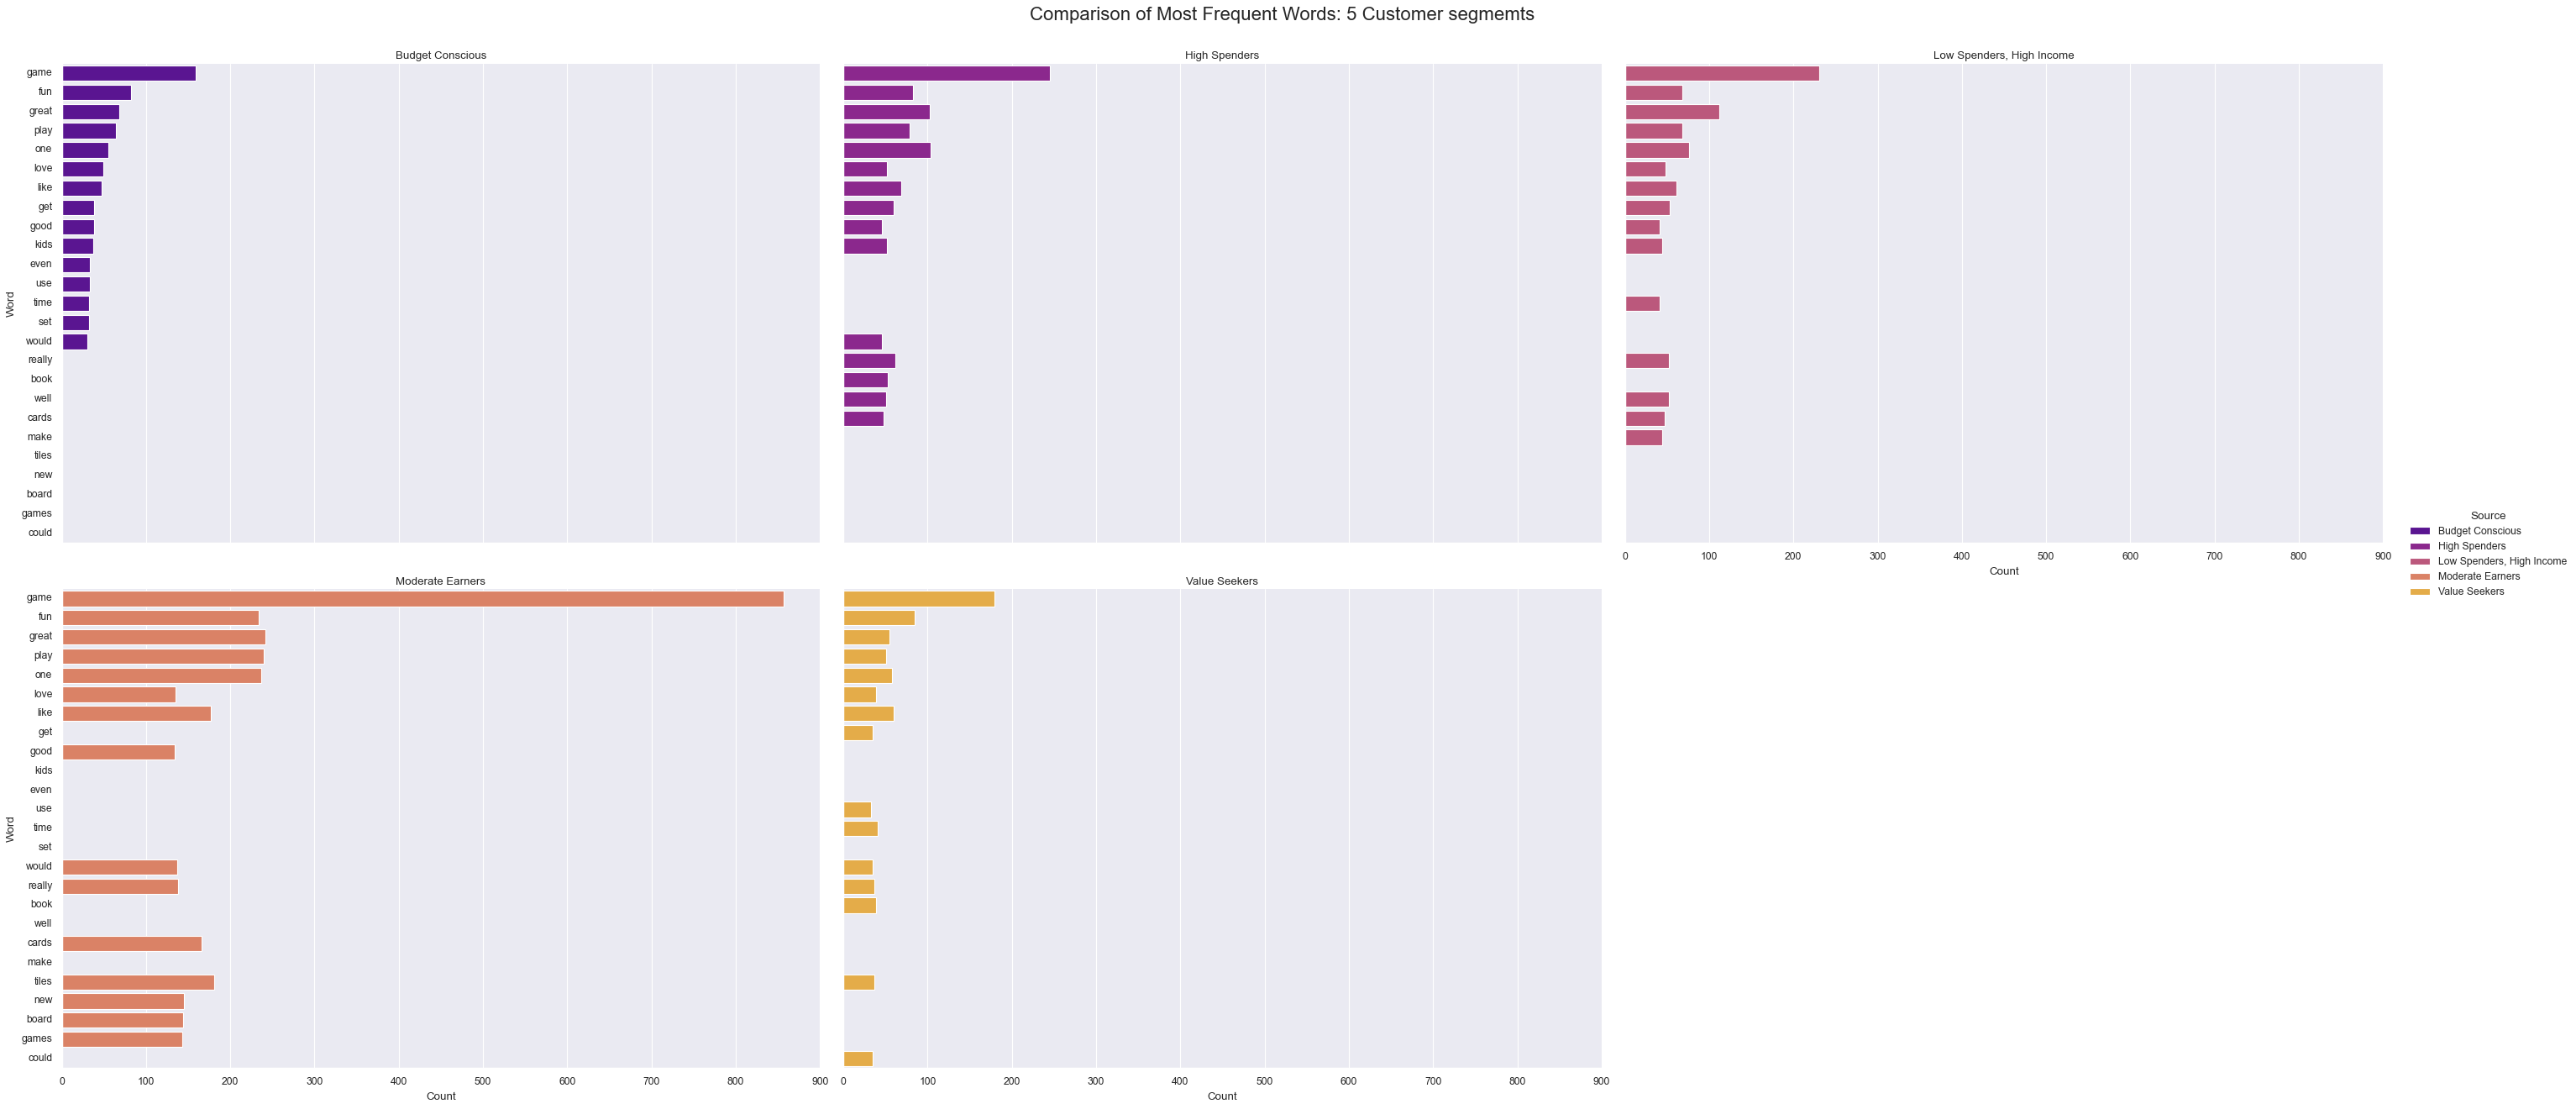

In [268]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a facet grid with five plots: one for each cluster
g = sns.catplot(
    data=combined_word_counts, kind="bar",
    x="Count", y="Word", hue="Source",
    col="Source", sharey=True,
    height=8, aspect=1.5,
    palette="plasma",
    col_wrap=3
)

# Set plot titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Count", "Word")
g.fig.suptitle("Comparison of Most Frequent Words: 5 Customer segmemts", fontsize=20, y=1.03)

# Save the plot as a PNG file
plt.savefig('most_frequent_words_5_segments.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


#### Insights and observations
> - The most frequently used word across all clusters is "game," which isn't surprising given the context. 
> - Other common words include "fun," "great," "play," "like," and "love."
> - Cluster 0: High Spenders. This group might include family-oriented customers, given the words "kids" and "love."
> - Cluster 1: Moderate Earners. Frequent words like "tiles," "cards," and "boards" suggest this cluster might be composed of board game enthusiasts who enjoy traditional elements. 
> - Cluster 2: Low spenders, high income. The words "make," "kids," and "well" could suggest a focus on games that are well-designed and engaging for children.
> - Cluster 3: Value seekers. Mention of "book" and "tiles" might indicate that this cluster prefers more strategic or intellectually engaging games. 
> - Cluster 4:  Budget conscious. Presence of words like "kids," "time," and "set" might suggests this cluster includes family-oriented customers who value games that are easy to set up and provide fun for children.


#### ii) Polarity analysis by cluster

In [272]:
# Name the clusters
cluster_names = {
    0: "High Spenders",
    1: "Moderate Earners",
    2: "Low Spenders, High Income",
    3: "Value Seekers",
    4: "Budget-Conscious"
}

In [274]:
# Function to calculate sentiment polarity
def calculate_sentiment_polarity(reviews):
    if len(reviews) == 0:
        return 0  # Or any other default value you prefer
    sentiments = [TextBlob(review).sentiment.polarity for review in reviews]
    return sum(sentiments) / len(sentiments)  # Average polarity


In [276]:
# Calculate sentiment polarity for each cluster
cluster_sentiments = {}

for cluster in range(5):  # For the 5 clusters (0 to 4)
    cluster_reviews = merged_df_cluster[merged_df_cluster['cluster'] == cluster]['cleaned_review']
    cluster_sentiments[cluster] = calculate_sentiment_polarity(cluster_reviews)

# Combine all cluster sentiments into a single DataFrame
sentiment_summary = pd.DataFrame(list(cluster_sentiments.items()), columns=['Cluster', 'Sentiment Polarity'])

# Add the cluster names to the sentiment summary
sentiment_summary['Cluster Name'] = sentiment_summary['Cluster'].map(cluster_names)

# set the 'Cluster' column as the index
sentiment_summary.set_index('Cluster', inplace=True)

# Display the sentiment summary as a matrix
print(sentiment_summary)


         Sentiment Polarity               Cluster Name
Cluster                                               
0                  0.213211              High Spenders
1                  0.197935           Moderate Earners
2                  0.252067  Low Spenders, High Income
3                  0.192042              Value Seekers
4                  0.212877           Budget-Conscious


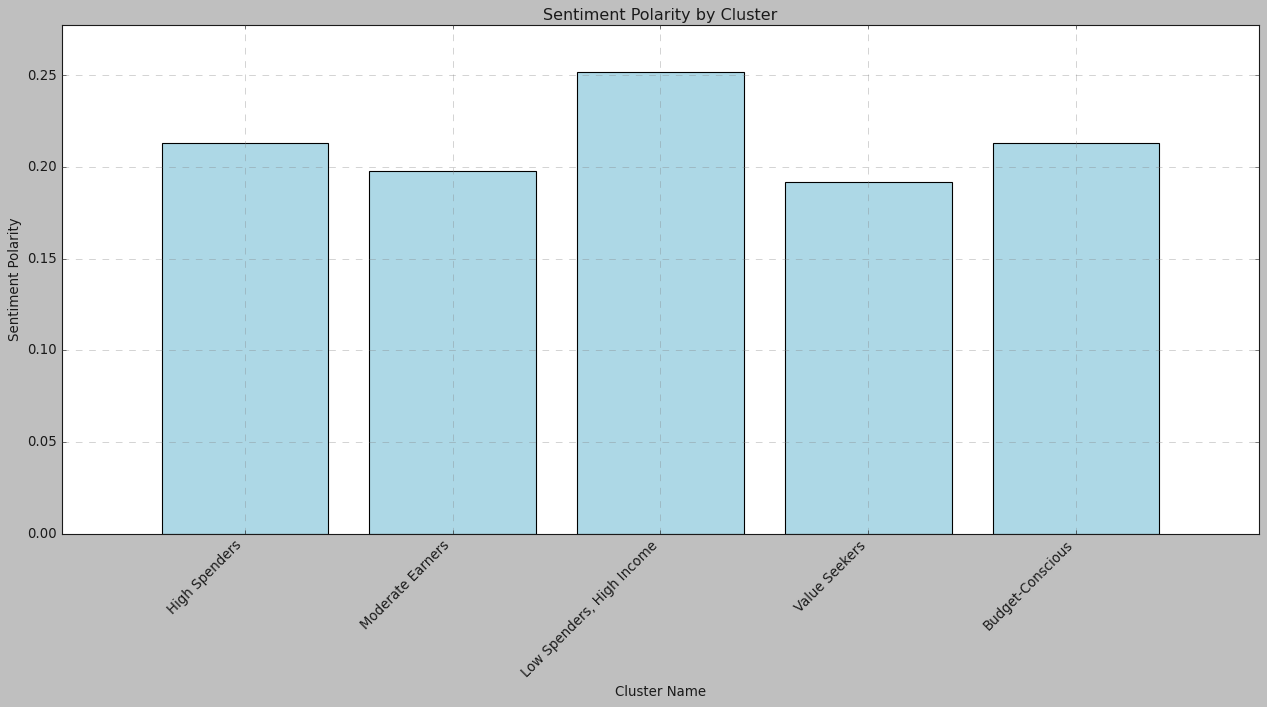

In [290]:
# Set classic style for the plot
plt.style.use('classic')

# Plot the sentiment polarity for each cluster
plt.figure(figsize=(16, 9))
bars = plt.bar(sentiment_summary['Cluster Name'], sentiment_summary['Sentiment Polarity'], 
               color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Cluster Name')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity by Cluster')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add space between bars and axes
plt.margins(x=0.1, y=0.1)

# Add a classic grid
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Display the plot with tight layout
plt.tight_layout()
plt.show()


#### Insights and observations
> - The sentiment polarity across the clusters is consistently positive, ranging from 0.19 to 0.25.
> - Cluster 0: High Spenders. Positive polarity indicates a favourable reception among these users
> - Cluster 1: Moderate Earners. Moderate polarity shows general satisfaction with these products.
> - Cluster 2: Low spenders, high income. This cluster has the highest sentiment polarity, indicating the most positive reviews.
> - Cluster 3: Value seekers. slightly lower sentiment polarity suggests that while they enjoy these games, they might also be more critical or have higher expectations.
> - Cluster 4:  Budget conscious. Positive polarity indicates a favourable reception among these users